In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
CIFAR100_LABELS_LIST = [
    'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'
]

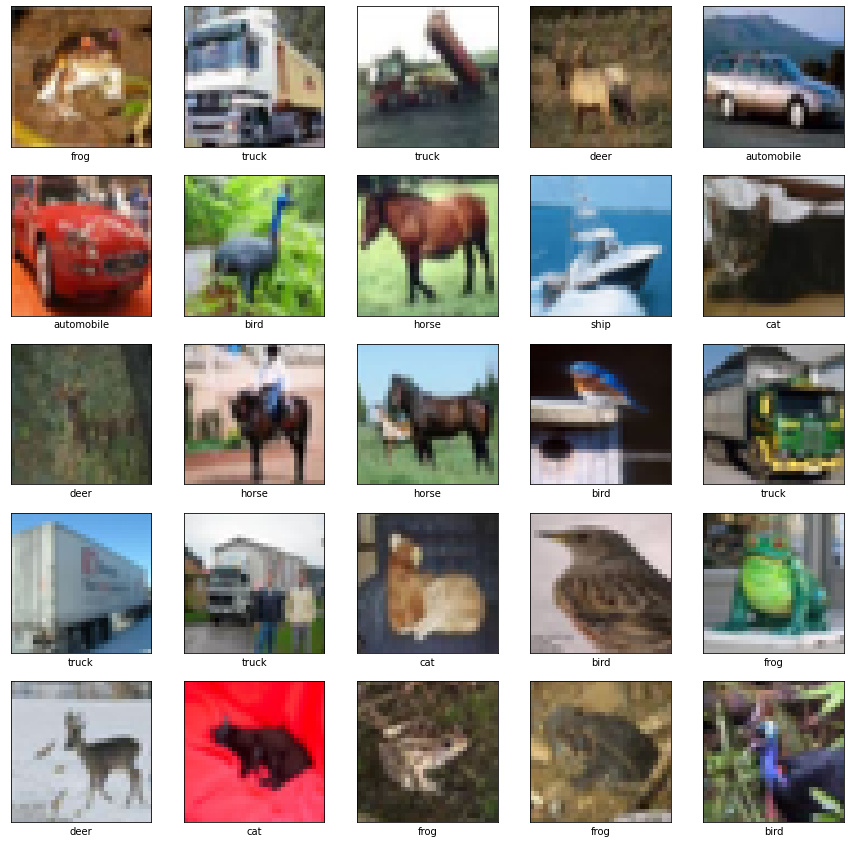

In [4]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(CIFAR100_LABELS_LIST[train_labels[i][0]])
plt.show()

In [5]:
train_images[0].shape

(32, 32, 3)

In [6]:
# try modify the filtersize, hidden layers, use model.add previous method we have learnt

In [7]:
def build_model():
    model = Sequential()
    model.add(Conv2D(96, (5,5), input_shape = (32,32,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units = 80, activation ='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(units = 500, activation ='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(units = 10, activation ='softmax'))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return model
    

model=tf.keras.Sequential([
      tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPool2D((2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(500,activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(200,activation='relu'),
      tf.keras.layers.Dense(100,activation='softmax')

])

In [8]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 96)        7296      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        55360     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 80)                184400    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               8

In [ ]:
# try to split validation data 

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6331 - accuracy: 0.4139 - val_loss: 1.4950 - val_accuracy: 0.4789
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 1.2506 - accuracy: 0.5546 - val_loss: 1.1512 - val_accuracy: 0.5967
Epoch 3/20
1563/1563 [==============================] - 82s 53ms/step - loss: 1.0918 - accuracy: 0.6179 - val_loss: 1.0656 - val_accuracy: 0.6276
Epoch 4/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9912 - accuracy: 0.6535 - val_loss: 1.0249 - val_accuracy: 0.6455
Epoch 5/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9212 - accuracy: 0.6765 - val_loss: 0.9789 - val_accuracy: 0.6650
Epoch 6/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8647 - accuracy: 0.6999 - val_loss: 0.9552 - val_accuracy: 0.6690
Epoch 7/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8095 - accuracy: 0.7164 - val_loss: 0.9606 -

In [15]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [16]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [17]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [18]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Epoch 1/3


 186/1407 [==>...........................] - ETA: 0s - loss: 2.3146 - accuracy: 0.06 - ETA: 1:47 - loss: 2.9158 - accuracy: 0.04 - ETA: 2:11 - loss: 2.9062 - accuracy: 0.06 - ETA: 2:19 - loss: 2.7511 - accuracy: 0.07 - ETA: 2:24 - loss: 2.6685 - accuracy: 0.06 - ETA: 2:29 - loss: 2.6096 - accuracy: 0.06 - ETA: 2:32 - loss: 2.5641 - accuracy: 0.07 - ETA: 2:34 - loss: 2.5316 - accuracy: 0.07 - ETA: 2:36 - loss: 2.5040 - accuracy: 0.07 - ETA: 2:37 - loss: 2.4840 - accuracy: 0.08 - ETA: 2:38 - loss: 2.4667 - accuracy: 0.09 - ETA: 2:39 - loss: 2.4497 - accuracy: 0.09 - ETA: 2:40 - loss: 2.4351 - accuracy: 0.09 - ETA: 2:41 - loss: 2.4259 - accuracy: 0.09 - ETA: 2:41 - loss: 2.4147 - accuracy: 0.09 - ETA: 2:41 - loss: 2.4048 - accuracy: 0.09 - ETA: 2:42 - loss: 2.3934 - accuracy: 0.09 - ETA: 2:42 - loss: 2.3884 - accuracy: 0.10 - ETA: 2:43 - loss: 2.3765 - accuracy: 0.10 - ETA: 2:44 - loss: 2.3674 - accuracy: 0.10 - ETA: 2:44 - loss: 2.3610 - accuracy: 0.10 - ETA: 2:44 - loss: 2.3548 - accura

 744/1407 [==============>...............] - ETA: 1:47 - loss: 1.6154 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6151 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6145 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6142 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6141 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6138 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6130 - accuracy: 0.41 - ETA: 1:46 - loss: 1.6129 - accuracy: 0.41 - ETA: 1:45 - loss: 1.6130 - accuracy: 0.41 - ETA: 1:45 - loss: 1.6126 - accuracy: 0.41 - ETA: 1:45 - loss: 1.6121 - accuracy: 0.41 - ETA: 1:45 - loss: 1.6114 - accuracy: 0.41 - ETA: 1:45 - loss: 1.6107 - accuracy: 0.42 - ETA: 1:45 - loss: 1.6099 - accuracy: 0.42 - ETA: 1:45 - loss: 1.6091 - accuracy: 0.42 - ETA: 1:45 - loss: 1.6088 - accuracy: 0.42 - ETA: 1:44 - loss: 1.6082 - accuracy: 0.42 - ETA: 1:44 - loss: 1.6077 - accuracy: 0.42 - ETA: 1:44 - loss: 1.6074 - accuracy: 0.42 - ETA: 1:44 - loss: 1.6069 - accuracy: 0.42 - ETA: 1:44 - loss: 1.6063 - accuracy: 0.42 - ETA: 1:44 - loss: 1.6051 - accu

 930/1407 [==================>...........] - ETA: 1:22 - loss: 1.5472 - accuracy: 0.44 - ETA: 1:22 - loss: 1.5469 - accuracy: 0.44 - ETA: 1:22 - loss: 1.5467 - accuracy: 0.44 - ETA: 1:22 - loss: 1.5463 - accuracy: 0.44 - ETA: 1:22 - loss: 1.5467 - accuracy: 0.44 - ETA: 1:22 - loss: 1.5464 - accuracy: 0.44 - ETA: 1:22 - loss: 1.5461 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5463 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5458 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5458 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5455 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5450 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5445 - accuracy: 0.44 - ETA: 1:21 - loss: 1.5441 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5439 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5432 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5433 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5430 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5429 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5423 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5420 - accuracy: 0.44 - ETA: 1:20 - loss: 1.5415 - accu

1116/1407 [======================>.......] - ETA: 59s - loss: 1.4984 - accuracy: 0.464 - ETA: 59s - loss: 1.4981 - accuracy: 0.464 - ETA: 58s - loss: 1.4977 - accuracy: 0.464 - ETA: 58s - loss: 1.4975 - accuracy: 0.464 - ETA: 58s - loss: 1.4970 - accuracy: 0.464 - ETA: 58s - loss: 1.4966 - accuracy: 0.464 - ETA: 58s - loss: 1.4962 - accuracy: 0.464 - ETA: 58s - loss: 1.4961 - accuracy: 0.464 - ETA: 58s - loss: 1.4957 - accuracy: 0.464 - ETA: 58s - loss: 1.4956 - accuracy: 0.464 - ETA: 57s - loss: 1.4956 - accuracy: 0.464 - ETA: 57s - loss: 1.4953 - accuracy: 0.464 - ETA: 57s - loss: 1.4954 - accuracy: 0.465 - ETA: 57s - loss: 1.4953 - accuracy: 0.465 - ETA: 57s - loss: 1.4949 - accuracy: 0.465 - ETA: 57s - loss: 1.4951 - accuracy: 0.465 - ETA: 57s - loss: 1.4948 - accuracy: 0.465 - ETA: 57s - loss: 1.4950 - accuracy: 0.465 - ETA: 56s - loss: 1.4947 - accuracy: 0.465 - ETA: 56s - loss: 1.4947 - accuracy: 0.465 - ETA: 56s - loss: 1.4945 - accuracy: 0.465 - ETA: 56s - loss: 1.4943 - accur

1302/1407 [==========================>...] - ETA: 35s - loss: 1.4593 - accuracy: 0.479 - ETA: 35s - loss: 1.4588 - accuracy: 0.479 - ETA: 35s - loss: 1.4587 - accuracy: 0.479 - ETA: 35s - loss: 1.4582 - accuracy: 0.479 - ETA: 35s - loss: 1.4579 - accuracy: 0.479 - ETA: 35s - loss: 1.4578 - accuracy: 0.480 - ETA: 35s - loss: 1.4575 - accuracy: 0.480 - ETA: 34s - loss: 1.4574 - accuracy: 0.480 - ETA: 34s - loss: 1.4570 - accuracy: 0.480 - ETA: 34s - loss: 1.4568 - accuracy: 0.480 - ETA: 34s - loss: 1.4566 - accuracy: 0.480 - ETA: 34s - loss: 1.4561 - accuracy: 0.480 - ETA: 34s - loss: 1.4555 - accuracy: 0.480 - ETA: 34s - loss: 1.4553 - accuracy: 0.480 - ETA: 34s - loss: 1.4550 - accuracy: 0.480 - ETA: 33s - loss: 1.4550 - accuracy: 0.480 - ETA: 33s - loss: 1.4548 - accuracy: 0.480 - ETA: 33s - loss: 1.4546 - accuracy: 0.480 - ETA: 33s - loss: 1.4543 - accuracy: 0.480 - ETA: 33s - loss: 1.4541 - accuracy: 0.481 - ETA: 33s - loss: 1.4538 - accuracy: 0.481 - ETA: 33s - loss: 1.4535 - accur

1407/1407 [==============================] - ETA: 12s - loss: 1.4244 - accuracy: 0.492 - ETA: 12s - loss: 1.4241 - accuracy: 0.492 - ETA: 12s - loss: 1.4238 - accuracy: 0.492 - ETA: 12s - loss: 1.4236 - accuracy: 0.492 - ETA: 12s - loss: 1.4234 - accuracy: 0.492 - ETA: 12s - loss: 1.4230 - accuracy: 0.492 - ETA: 12s - loss: 1.4228 - accuracy: 0.492 - ETA: 11s - loss: 1.4226 - accuracy: 0.492 - ETA: 11s - loss: 1.4225 - accuracy: 0.492 - ETA: 11s - loss: 1.4224 - accuracy: 0.492 - ETA: 11s - loss: 1.4222 - accuracy: 0.493 - ETA: 11s - loss: 1.4220 - accuracy: 0.493 - ETA: 11s - loss: 1.4219 - accuracy: 0.493 - ETA: 11s - loss: 1.4218 - accuracy: 0.493 - ETA: 11s - loss: 1.4215 - accuracy: 0.493 - ETA: 10s - loss: 1.4213 - accuracy: 0.493 - ETA: 10s - loss: 1.4211 - accuracy: 0.493 - ETA: 10s - loss: 1.4210 - accuracy: 0.493 - ETA: 10s - loss: 1.4207 - accuracy: 0.493 - ETA: 10s - loss: 1.4206 - accuracy: 0.493 - ETA: 10s - loss: 1.4206 - accuracy: 0.493 - ETA: 10s - loss: 1.4204 - accur

 186/1407 [==>...........................] - ETA: 0s - loss: 1.0837 - accuracy: 0.65 - ETA: 1:24 - loss: 0.9781 - accuracy: 0.70 - ETA: 1:56 - loss: 0.9665 - accuracy: 0.68 - ETA: 2:09 - loss: 0.9573 - accuracy: 0.67 - ETA: 2:16 - loss: 0.9723 - accuracy: 0.67 - ETA: 2:21 - loss: 1.0173 - accuracy: 0.66 - ETA: 2:24 - loss: 1.0026 - accuracy: 0.65 - ETA: 2:27 - loss: 1.0240 - accuracy: 0.64 - ETA: 2:30 - loss: 1.0582 - accuracy: 0.63 - ETA: 2:32 - loss: 1.0406 - accuracy: 0.64 - ETA: 2:32 - loss: 1.0085 - accuracy: 0.65 - ETA: 2:33 - loss: 0.9974 - accuracy: 0.66 - ETA: 2:35 - loss: 1.0055 - accuracy: 0.65 - ETA: 2:35 - loss: 1.0033 - accuracy: 0.65 - ETA: 2:36 - loss: 1.0235 - accuracy: 0.65 - ETA: 2:37 - loss: 1.0117 - accuracy: 0.66 - ETA: 2:37 - loss: 1.0378 - accuracy: 0.65 - ETA: 2:37 - loss: 1.0350 - accuracy: 0.65 - ETA: 2:37 - loss: 1.0270 - accuracy: 0.66 - ETA: 2:38 - loss: 1.0265 - accuracy: 0.65 - ETA: 2:38 - loss: 1.0294 - accuracy: 0.65 - ETA: 2:38 - loss: 1.0254 - accura

 744/1407 [==============>...............] - ETA: 1:41 - loss: 1.0447 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0447 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0449 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0444 - accuracy: 0.62 - ETA: 1:41 - loss: 1.0449 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0452 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0449 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0447 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0449 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0453 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0457 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0458 - accuracy: 0.62 - ETA: 1:40 - loss: 1.0461 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0463 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0464 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0460 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0463 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0457 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0454 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0452 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0450 - accuracy: 0.62 - ETA: 1:39 - loss: 1.0450 - accu

 930/1407 [==================>...........] - ETA: 1:19 - loss: 1.0433 - accuracy: 0.62 - ETA: 1:19 - loss: 1.0432 - accuracy: 0.62 - ETA: 1:19 - loss: 1.0431 - accuracy: 0.62 - ETA: 1:19 - loss: 1.0432 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0428 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0427 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0426 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0424 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0421 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0427 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0427 - accuracy: 0.62 - ETA: 1:18 - loss: 1.0427 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0427 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0428 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0433 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0433 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0429 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0430 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0432 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0432 - accuracy: 0.62 - ETA: 1:17 - loss: 1.0429 - accuracy: 0.62 - ETA: 1:16 - loss: 1.0432 - accu

1116/1407 [======================>.......] - ETA: 57s - loss: 1.0360 - accuracy: 0.631 - ETA: 56s - loss: 1.0355 - accuracy: 0.631 - ETA: 56s - loss: 1.0355 - accuracy: 0.631 - ETA: 56s - loss: 1.0356 - accuracy: 0.631 - ETA: 56s - loss: 1.0354 - accuracy: 0.631 - ETA: 56s - loss: 1.0354 - accuracy: 0.631 - ETA: 56s - loss: 1.0354 - accuracy: 0.631 - ETA: 56s - loss: 1.0353 - accuracy: 0.631 - ETA: 56s - loss: 1.0354 - accuracy: 0.631 - ETA: 56s - loss: 1.0354 - accuracy: 0.631 - ETA: 55s - loss: 1.0351 - accuracy: 0.631 - ETA: 55s - loss: 1.0351 - accuracy: 0.631 - ETA: 55s - loss: 1.0350 - accuracy: 0.631 - ETA: 55s - loss: 1.0350 - accuracy: 0.631 - ETA: 55s - loss: 1.0349 - accuracy: 0.632 - ETA: 55s - loss: 1.0351 - accuracy: 0.632 - ETA: 55s - loss: 1.0348 - accuracy: 0.632 - ETA: 55s - loss: 1.0348 - accuracy: 0.632 - ETA: 54s - loss: 1.0346 - accuracy: 0.632 - ETA: 54s - loss: 1.0347 - accuracy: 0.632 - ETA: 54s - loss: 1.0350 - accuracy: 0.631 - ETA: 54s - loss: 1.0351 - accur

1302/1407 [==========================>...] - ETA: 34s - loss: 1.0331 - accuracy: 0.632 - ETA: 34s - loss: 1.0332 - accuracy: 0.632 - ETA: 34s - loss: 1.0332 - accuracy: 0.632 - ETA: 34s - loss: 1.0333 - accuracy: 0.632 - ETA: 34s - loss: 1.0334 - accuracy: 0.632 - ETA: 34s - loss: 1.0336 - accuracy: 0.632 - ETA: 34s - loss: 1.0337 - accuracy: 0.632 - ETA: 33s - loss: 1.0336 - accuracy: 0.632 - ETA: 33s - loss: 1.0334 - accuracy: 0.632 - ETA: 33s - loss: 1.0332 - accuracy: 0.632 - ETA: 33s - loss: 1.0333 - accuracy: 0.632 - ETA: 33s - loss: 1.0333 - accuracy: 0.631 - ETA: 33s - loss: 1.0332 - accuracy: 0.631 - ETA: 33s - loss: 1.0329 - accuracy: 0.632 - ETA: 33s - loss: 1.0328 - accuracy: 0.632 - ETA: 32s - loss: 1.0328 - accuracy: 0.632 - ETA: 32s - loss: 1.0328 - accuracy: 0.632 - ETA: 32s - loss: 1.0327 - accuracy: 0.632 - ETA: 32s - loss: 1.0327 - accuracy: 0.632 - ETA: 32s - loss: 1.0330 - accuracy: 0.632 - ETA: 32s - loss: 1.0329 - accuracy: 0.632 - ETA: 32s - loss: 1.0332 - accur

1407/1407 [==============================] - ETA: 12s - loss: 1.0282 - accuracy: 0.634 - ETA: 12s - loss: 1.0282 - accuracy: 0.634 - ETA: 12s - loss: 1.0281 - accuracy: 0.634 - ETA: 12s - loss: 1.0280 - accuracy: 0.634 - ETA: 11s - loss: 1.0281 - accuracy: 0.634 - ETA: 11s - loss: 1.0284 - accuracy: 0.634 - ETA: 11s - loss: 1.0284 - accuracy: 0.634 - ETA: 11s - loss: 1.0283 - accuracy: 0.634 - ETA: 11s - loss: 1.0285 - accuracy: 0.634 - ETA: 11s - loss: 1.0284 - accuracy: 0.634 - ETA: 11s - loss: 1.0282 - accuracy: 0.634 - ETA: 11s - loss: 1.0283 - accuracy: 0.634 - ETA: 11s - loss: 1.0284 - accuracy: 0.634 - ETA: 10s - loss: 1.0283 - accuracy: 0.634 - ETA: 10s - loss: 1.0282 - accuracy: 0.634 - ETA: 10s - loss: 1.0282 - accuracy: 0.634 - ETA: 10s - loss: 1.0283 - accuracy: 0.634 - ETA: 10s - loss: 1.0281 - accuracy: 0.634 - ETA: 10s - loss: 1.0281 - accuracy: 0.634 - ETA: 10s - loss: 1.0285 - accuracy: 0.634 - ETA: 10s - loss: 1.0285 - accuracy: 0.634 - ETA: 9s - loss: 1.0288 - accura

 186/1407 [==>...........................] - ETA: 0s - loss: 0.8756 - accuracy: 0.65 - ETA: 1:42 - loss: 0.7902 - accuracy: 0.68 - ETA: 2:17 - loss: 0.8445 - accuracy: 0.66 - ETA: 2:24 - loss: 0.7763 - accuracy: 0.68 - ETA: 2:36 - loss: 0.8079 - accuracy: 0.67 - ETA: 2:44 - loss: 0.8126 - accuracy: 0.66 - ETA: 2:44 - loss: 0.7824 - accuracy: 0.69 - ETA: 2:49 - loss: 0.7748 - accuracy: 0.70 - ETA: 2:52 - loss: 0.7936 - accuracy: 0.69 - ETA: 2:51 - loss: 0.7856 - accuracy: 0.70 - ETA: 2:54 - loss: 0.7620 - accuracy: 0.71 - ETA: 2:53 - loss: 0.7646 - accuracy: 0.71 - ETA: 2:55 - loss: 0.7858 - accuracy: 0.70 - ETA: 2:56 - loss: 0.7791 - accuracy: 0.70 - ETA: 2:56 - loss: 0.7689 - accuracy: 0.71 - ETA: 2:56 - loss: 0.7640 - accuracy: 0.71 - ETA: 2:57 - loss: 0.7572 - accuracy: 0.72 - ETA: 2:58 - loss: 0.7521 - accuracy: 0.72 - ETA: 2:59 - loss: 0.7609 - accuracy: 0.72 - ETA: 2:58 - loss: 0.7922 - accuracy: 0.70 - ETA: 2:58 - loss: 0.7870 - accuracy: 0.71 - ETA: 3:00 - loss: 0.7950 - accura

 744/1407 [==============>...............] - ETA: 1:44 - loss: 0.8106 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8109 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8110 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8109 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8110 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8114 - accuracy: 0.71 - ETA: 1:44 - loss: 0.8114 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8110 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8108 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8110 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8103 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8112 - accuracy: 0.71 - ETA: 1:43 - loss: 0.8115 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8121 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8121 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8120 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8123 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8121 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8119 - accuracy: 0.71 - ETA: 1:42 - loss: 0.8119 - accuracy: 0.71 - ETA: 1:41 - loss: 0.8120 - accuracy: 0.71 - ETA: 1:41 - loss: 0.8114 - accu

 930/1407 [==================>...........] - ETA: 1:18 - loss: 0.8170 - accuracy: 0.71 - ETA: 1:18 - loss: 0.8166 - accuracy: 0.71 - ETA: 1:18 - loss: 0.8166 - accuracy: 0.71 - ETA: 1:18 - loss: 0.8167 - accuracy: 0.71 - ETA: 1:18 - loss: 0.8169 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8165 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8165 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8161 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8162 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8164 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8164 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8162 - accuracy: 0.71 - ETA: 1:17 - loss: 0.8164 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8168 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8168 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8169 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8171 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8175 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8171 - accuracy: 0.71 - ETA: 1:16 - loss: 0.8169 - accuracy: 0.71 - ETA: 1:15 - loss: 0.8169 - accuracy: 0.71 - ETA: 1:15 - loss: 0.8171 - accu

1116/1407 [======================>.......] - ETA: 56s - loss: 0.8213 - accuracy: 0.708 - ETA: 56s - loss: 0.8212 - accuracy: 0.708 - ETA: 55s - loss: 0.8213 - accuracy: 0.708 - ETA: 55s - loss: 0.8213 - accuracy: 0.708 - ETA: 55s - loss: 0.8210 - accuracy: 0.708 - ETA: 55s - loss: 0.8210 - accuracy: 0.709 - ETA: 55s - loss: 0.8212 - accuracy: 0.709 - ETA: 55s - loss: 0.8212 - accuracy: 0.709 - ETA: 55s - loss: 0.8212 - accuracy: 0.709 - ETA: 55s - loss: 0.8211 - accuracy: 0.709 - ETA: 54s - loss: 0.8214 - accuracy: 0.708 - ETA: 54s - loss: 0.8212 - accuracy: 0.708 - ETA: 54s - loss: 0.8210 - accuracy: 0.708 - ETA: 54s - loss: 0.8207 - accuracy: 0.709 - ETA: 54s - loss: 0.8206 - accuracy: 0.709 - ETA: 54s - loss: 0.8209 - accuracy: 0.708 - ETA: 54s - loss: 0.8208 - accuracy: 0.708 - ETA: 54s - loss: 0.8205 - accuracy: 0.709 - ETA: 54s - loss: 0.8209 - accuracy: 0.708 - ETA: 53s - loss: 0.8211 - accuracy: 0.708 - ETA: 53s - loss: 0.8209 - accuracy: 0.709 - ETA: 53s - loss: 0.8210 - accur

1302/1407 [==========================>...] - ETA: 34s - loss: 0.8207 - accuracy: 0.708 - ETA: 34s - loss: 0.8207 - accuracy: 0.708 - ETA: 34s - loss: 0.8206 - accuracy: 0.708 - ETA: 34s - loss: 0.8207 - accuracy: 0.708 - ETA: 34s - loss: 0.8208 - accuracy: 0.709 - ETA: 34s - loss: 0.8207 - accuracy: 0.709 - ETA: 33s - loss: 0.8207 - accuracy: 0.709 - ETA: 33s - loss: 0.8206 - accuracy: 0.709 - ETA: 33s - loss: 0.8206 - accuracy: 0.709 - ETA: 33s - loss: 0.8205 - accuracy: 0.709 - ETA: 33s - loss: 0.8204 - accuracy: 0.709 - ETA: 33s - loss: 0.8205 - accuracy: 0.709 - ETA: 33s - loss: 0.8202 - accuracy: 0.709 - ETA: 33s - loss: 0.8200 - accuracy: 0.709 - ETA: 32s - loss: 0.8198 - accuracy: 0.709 - ETA: 32s - loss: 0.8198 - accuracy: 0.709 - ETA: 32s - loss: 0.8195 - accuracy: 0.709 - ETA: 32s - loss: 0.8195 - accuracy: 0.709 - ETA: 32s - loss: 0.8196 - accuracy: 0.709 - ETA: 32s - loss: 0.8194 - accuracy: 0.709 - ETA: 32s - loss: 0.8196 - accuracy: 0.709 - ETA: 32s - loss: 0.8195 - accur

1407/1407 [==============================] - ETA: 12s - loss: 0.8239 - accuracy: 0.707 - ETA: 12s - loss: 0.8238 - accuracy: 0.707 - ETA: 12s - loss: 0.8239 - accuracy: 0.707 - ETA: 12s - loss: 0.8238 - accuracy: 0.707 - ETA: 11s - loss: 0.8237 - accuracy: 0.707 - ETA: 11s - loss: 0.8237 - accuracy: 0.707 - ETA: 11s - loss: 0.8238 - accuracy: 0.707 - ETA: 11s - loss: 0.8235 - accuracy: 0.707 - ETA: 11s - loss: 0.8237 - accuracy: 0.707 - ETA: 11s - loss: 0.8238 - accuracy: 0.707 - ETA: 11s - loss: 0.8238 - accuracy: 0.707 - ETA: 11s - loss: 0.8237 - accuracy: 0.707 - ETA: 10s - loss: 0.8236 - accuracy: 0.707 - ETA: 10s - loss: 0.8236 - accuracy: 0.707 - ETA: 10s - loss: 0.8235 - accuracy: 0.707 - ETA: 10s - loss: 0.8234 - accuracy: 0.707 - ETA: 10s - loss: 0.8233 - accuracy: 0.707 - ETA: 10s - loss: 0.8230 - accuracy: 0.708 - ETA: 10s - loss: 0.8228 - accuracy: 0.708 - ETA: 10s - loss: 0.8229 - accuracy: 0.708 - ETA: 10s - loss: 0.8232 - accuracy: 0.707 - ETA: 9s - loss: 0.8232 - accura

Epoch 1/3


 186/1407 [==>...........................] - ETA: 0s - loss: 2.3153 - accuracy: 0.15 - ETA: 1:54 - loss: 2.3121 - accuracy: 0.12 - ETA: 2:28 - loss: 2.3420 - accuracy: 0.12 - ETA: 2:44 - loss: 2.3137 - accuracy: 0.13 - ETA: 2:53 - loss: 2.3084 - accuracy: 0.11 - ETA: 3:01 - loss: 2.3061 - accuracy: 0.13 - ETA: 3:06 - loss: 2.3043 - accuracy: 0.12 - ETA: 3:10 - loss: 2.3010 - accuracy: 0.12 - ETA: 3:12 - loss: 2.2985 - accuracy: 0.12 - ETA: 3:14 - loss: 2.2955 - accuracy: 0.12 - ETA: 3:16 - loss: 2.2922 - accuracy: 0.12 - ETA: 3:18 - loss: 2.2891 - accuracy: 0.11 - ETA: 3:20 - loss: 2.2932 - accuracy: 0.11 - ETA: 3:21 - loss: 2.2886 - accuracy: 0.11 - ETA: 3:22 - loss: 2.2852 - accuracy: 0.12 - ETA: 3:24 - loss: 2.2823 - accuracy: 0.11 - ETA: 3:24 - loss: 2.2789 - accuracy: 0.11 - ETA: 3:26 - loss: 2.2715 - accuracy: 0.12 - ETA: 3:27 - loss: 2.2773 - accuracy: 0.12 - ETA: 3:27 - loss: 2.2760 - accuracy: 0.12 - ETA: 3:28 - loss: 2.2739 - accuracy: 0.13 - ETA: 3:28 - loss: 2.2681 - accura

 744/1407 [==============>...............] - ETA: 2:16 - loss: 1.9061 - accuracy: 0.30 - ETA: 2:16 - loss: 1.9058 - accuracy: 0.30 - ETA: 2:16 - loss: 1.9057 - accuracy: 0.30 - ETA: 2:16 - loss: 1.9055 - accuracy: 0.30 - ETA: 2:16 - loss: 1.9050 - accuracy: 0.30 - ETA: 2:15 - loss: 1.9048 - accuracy: 0.30 - ETA: 2:15 - loss: 1.9046 - accuracy: 0.30 - ETA: 2:15 - loss: 1.9043 - accuracy: 0.30 - ETA: 2:15 - loss: 1.9044 - accuracy: 0.30 - ETA: 2:15 - loss: 1.9039 - accuracy: 0.30 - ETA: 2:15 - loss: 1.9041 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9036 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9036 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9037 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9033 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9027 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9021 - accuracy: 0.30 - ETA: 2:14 - loss: 1.9017 - accuracy: 0.30 - ETA: 2:13 - loss: 1.9013 - accuracy: 0.30 - ETA: 2:13 - loss: 1.9008 - accuracy: 0.30 - ETA: 2:13 - loss: 1.9000 - accuracy: 0.30 - ETA: 2:13 - loss: 1.8994 - accu

 930/1407 [==================>...........] - ETA: 1:46 - loss: 1.8397 - accuracy: 0.33 - ETA: 1:46 - loss: 1.8395 - accuracy: 0.33 - ETA: 1:46 - loss: 1.8393 - accuracy: 0.33 - ETA: 1:46 - loss: 1.8392 - accuracy: 0.33 - ETA: 1:46 - loss: 1.8387 - accuracy: 0.33 - ETA: 1:45 - loss: 1.8381 - accuracy: 0.33 - ETA: 1:45 - loss: 1.8379 - accuracy: 0.33 - ETA: 1:45 - loss: 1.8376 - accuracy: 0.33 - ETA: 1:45 - loss: 1.8373 - accuracy: 0.33 - ETA: 1:45 - loss: 1.8372 - accuracy: 0.33 - ETA: 1:45 - loss: 1.8371 - accuracy: 0.33 - ETA: 1:44 - loss: 1.8367 - accuracy: 0.33 - ETA: 1:44 - loss: 1.8363 - accuracy: 0.33 - ETA: 1:44 - loss: 1.8358 - accuracy: 0.33 - ETA: 1:44 - loss: 1.8356 - accuracy: 0.33 - ETA: 1:44 - loss: 1.8353 - accuracy: 0.33 - ETA: 1:44 - loss: 1.8351 - accuracy: 0.33 - ETA: 1:43 - loss: 1.8350 - accuracy: 0.33 - ETA: 1:43 - loss: 1.8347 - accuracy: 0.33 - ETA: 1:43 - loss: 1.8345 - accuracy: 0.33 - ETA: 1:43 - loss: 1.8345 - accuracy: 0.33 - ETA: 1:43 - loss: 1.8344 - accu

1116/1407 [======================>.......] - ETA: 1:16 - loss: 1.7919 - accuracy: 0.34 - ETA: 1:16 - loss: 1.7918 - accuracy: 0.34 - ETA: 1:16 - loss: 1.7919 - accuracy: 0.34 - ETA: 1:16 - loss: 1.7917 - accuracy: 0.34 - ETA: 1:16 - loss: 1.7912 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7909 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7905 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7905 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7900 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7899 - accuracy: 0.34 - ETA: 1:15 - loss: 1.7895 - accuracy: 0.34 - ETA: 1:14 - loss: 1.7890 - accuracy: 0.34 - ETA: 1:14 - loss: 1.7889 - accuracy: 0.34 - ETA: 1:14 - loss: 1.7886 - accuracy: 0.34 - ETA: 1:14 - loss: 1.7882 - accuracy: 0.35 - ETA: 1:14 - loss: 1.7882 - accuracy: 0.35 - ETA: 1:14 - loss: 1.7883 - accuracy: 0.35 - ETA: 1:13 - loss: 1.7877 - accuracy: 0.35 - ETA: 1:13 - loss: 1.7873 - accuracy: 0.35 - ETA: 1:13 - loss: 1.7874 - accuracy: 0.35 - ETA: 1:13 - loss: 1.7873 - accuracy: 0.35 - ETA: 1:13 - loss: 1.7871 - accu

1302/1407 [==========================>...] - ETA: 46s - loss: 1.7513 - accuracy: 0.365 - ETA: 46s - loss: 1.7510 - accuracy: 0.365 - ETA: 46s - loss: 1.7508 - accuracy: 0.365 - ETA: 46s - loss: 1.7506 - accuracy: 0.365 - ETA: 46s - loss: 1.7501 - accuracy: 0.365 - ETA: 45s - loss: 1.7500 - accuracy: 0.365 - ETA: 45s - loss: 1.7498 - accuracy: 0.365 - ETA: 45s - loss: 1.7496 - accuracy: 0.365 - ETA: 45s - loss: 1.7495 - accuracy: 0.365 - ETA: 45s - loss: 1.7494 - accuracy: 0.365 - ETA: 45s - loss: 1.7492 - accuracy: 0.365 - ETA: 44s - loss: 1.7490 - accuracy: 0.365 - ETA: 44s - loss: 1.7488 - accuracy: 0.365 - ETA: 44s - loss: 1.7483 - accuracy: 0.366 - ETA: 44s - loss: 1.7481 - accuracy: 0.366 - ETA: 44s - loss: 1.7481 - accuracy: 0.366 - ETA: 44s - loss: 1.7480 - accuracy: 0.366 - ETA: 44s - loss: 1.7477 - accuracy: 0.366 - ETA: 43s - loss: 1.7475 - accuracy: 0.366 - ETA: 43s - loss: 1.7472 - accuracy: 0.366 - ETA: 43s - loss: 1.7468 - accuracy: 0.366 - ETA: 43s - loss: 1.7467 - accur

1407/1407 [==============================] - ETA: 16s - loss: 1.7203 - accuracy: 0.376 - ETA: 16s - loss: 1.7200 - accuracy: 0.376 - ETA: 16s - loss: 1.7196 - accuracy: 0.376 - ETA: 16s - loss: 1.7194 - accuracy: 0.376 - ETA: 16s - loss: 1.7191 - accuracy: 0.377 - ETA: 15s - loss: 1.7187 - accuracy: 0.377 - ETA: 15s - loss: 1.7183 - accuracy: 0.377 - ETA: 15s - loss: 1.7181 - accuracy: 0.377 - ETA: 15s - loss: 1.7180 - accuracy: 0.377 - ETA: 15s - loss: 1.7178 - accuracy: 0.377 - ETA: 15s - loss: 1.7177 - accuracy: 0.377 - ETA: 14s - loss: 1.7175 - accuracy: 0.377 - ETA: 14s - loss: 1.7171 - accuracy: 0.377 - ETA: 14s - loss: 1.7166 - accuracy: 0.377 - ETA: 14s - loss: 1.7165 - accuracy: 0.377 - ETA: 14s - loss: 1.7162 - accuracy: 0.377 - ETA: 14s - loss: 1.7161 - accuracy: 0.378 - ETA: 14s - loss: 1.7160 - accuracy: 0.378 - ETA: 13s - loss: 1.7163 - accuracy: 0.377 - ETA: 13s - loss: 1.7162 - accuracy: 0.378 - ETA: 13s - loss: 1.7158 - accuracy: 0.378 - ETA: 13s - loss: 1.7156 - accur

 186/1407 [==>...........................] - ETA: 0s - loss: 1.3922 - accuracy: 0.53 - ETA: 1:57 - loss: 1.4891 - accuracy: 0.46 - ETA: 2:39 - loss: 1.5826 - accuracy: 0.43 - ETA: 2:55 - loss: 1.5372 - accuracy: 0.46 - ETA: 3:05 - loss: 1.5015 - accuracy: 0.48 - ETA: 3:13 - loss: 1.5256 - accuracy: 0.47 - ETA: 3:18 - loss: 1.4828 - accuracy: 0.49 - ETA: 3:23 - loss: 1.4809 - accuracy: 0.48 - ETA: 3:26 - loss: 1.4913 - accuracy: 0.46 - ETA: 3:28 - loss: 1.5023 - accuracy: 0.46 - ETA: 3:30 - loss: 1.4898 - accuracy: 0.47 - ETA: 3:32 - loss: 1.4971 - accuracy: 0.46 - ETA: 3:33 - loss: 1.4976 - accuracy: 0.46 - ETA: 3:34 - loss: 1.4947 - accuracy: 0.46 - ETA: 3:35 - loss: 1.5205 - accuracy: 0.46 - ETA: 3:36 - loss: 1.5158 - accuracy: 0.47 - ETA: 3:36 - loss: 1.5021 - accuracy: 0.47 - ETA: 3:36 - loss: 1.5143 - accuracy: 0.47 - ETA: 3:36 - loss: 1.5129 - accuracy: 0.47 - ETA: 3:36 - loss: 1.5091 - accuracy: 0.47 - ETA: 3:37 - loss: 1.5075 - accuracy: 0.47 - ETA: 3:37 - loss: 1.5117 - accura

 744/1407 [==============>...............] - ETA: 2:20 - loss: 1.4274 - accuracy: 0.48 - ETA: 2:20 - loss: 1.4278 - accuracy: 0.48 - ETA: 2:20 - loss: 1.4289 - accuracy: 0.48 - ETA: 2:20 - loss: 1.4293 - accuracy: 0.48 - ETA: 2:20 - loss: 1.4293 - accuracy: 0.48 - ETA: 2:19 - loss: 1.4293 - accuracy: 0.48 - ETA: 2:19 - loss: 1.4281 - accuracy: 0.48 - ETA: 2:19 - loss: 1.4284 - accuracy: 0.48 - ETA: 2:19 - loss: 1.4283 - accuracy: 0.48 - ETA: 2:19 - loss: 1.4278 - accuracy: 0.48 - ETA: 2:18 - loss: 1.4280 - accuracy: 0.48 - ETA: 2:18 - loss: 1.4281 - accuracy: 0.48 - ETA: 2:18 - loss: 1.4284 - accuracy: 0.48 - ETA: 2:18 - loss: 1.4283 - accuracy: 0.48 - ETA: 2:18 - loss: 1.4282 - accuracy: 0.48 - ETA: 2:18 - loss: 1.4282 - accuracy: 0.48 - ETA: 2:17 - loss: 1.4279 - accuracy: 0.48 - ETA: 2:17 - loss: 1.4278 - accuracy: 0.48 - ETA: 2:17 - loss: 1.4276 - accuracy: 0.48 - ETA: 2:17 - loss: 1.4274 - accuracy: 0.48 - ETA: 2:17 - loss: 1.4271 - accuracy: 0.48 - ETA: 2:17 - loss: 1.4271 - accu

 930/1407 [==================>...........] - ETA: 1:49 - loss: 1.4204 - accuracy: 0.49 - ETA: 1:48 - loss: 1.4208 - accuracy: 0.49 - ETA: 1:48 - loss: 1.4208 - accuracy: 0.49 - ETA: 1:48 - loss: 1.4211 - accuracy: 0.49 - ETA: 1:48 - loss: 1.4210 - accuracy: 0.49 - ETA: 1:48 - loss: 1.4211 - accuracy: 0.49 - ETA: 1:48 - loss: 1.4214 - accuracy: 0.49 - ETA: 1:47 - loss: 1.4216 - accuracy: 0.49 - ETA: 1:47 - loss: 1.4215 - accuracy: 0.49 - ETA: 1:47 - loss: 1.4211 - accuracy: 0.49 - ETA: 1:47 - loss: 1.4211 - accuracy: 0.49 - ETA: 1:47 - loss: 1.4216 - accuracy: 0.49 - ETA: 1:47 - loss: 1.4215 - accuracy: 0.49 - ETA: 1:46 - loss: 1.4215 - accuracy: 0.49 - ETA: 1:46 - loss: 1.4210 - accuracy: 0.49 - ETA: 1:46 - loss: 1.4208 - accuracy: 0.49 - ETA: 1:46 - loss: 1.4206 - accuracy: 0.49 - ETA: 1:46 - loss: 1.4209 - accuracy: 0.49 - ETA: 1:45 - loss: 1.4211 - accuracy: 0.49 - ETA: 1:45 - loss: 1.4206 - accuracy: 0.49 - ETA: 1:45 - loss: 1.4209 - accuracy: 0.49 - ETA: 1:45 - loss: 1.4211 - accu

1116/1407 [======================>.......] - ETA: 1:18 - loss: 1.4153 - accuracy: 0.49 - ETA: 1:17 - loss: 1.4152 - accuracy: 0.49 - ETA: 1:17 - loss: 1.4154 - accuracy: 0.49 - ETA: 1:17 - loss: 1.4154 - accuracy: 0.49 - ETA: 1:17 - loss: 1.4152 - accuracy: 0.49 - ETA: 1:17 - loss: 1.4152 - accuracy: 0.49 - ETA: 1:17 - loss: 1.4150 - accuracy: 0.49 - ETA: 1:16 - loss: 1.4153 - accuracy: 0.49 - ETA: 1:16 - loss: 1.4155 - accuracy: 0.49 - ETA: 1:16 - loss: 1.4152 - accuracy: 0.49 - ETA: 1:16 - loss: 1.4153 - accuracy: 0.49 - ETA: 1:16 - loss: 1.4154 - accuracy: 0.49 - ETA: 1:16 - loss: 1.4153 - accuracy: 0.49 - ETA: 1:15 - loss: 1.4154 - accuracy: 0.49 - ETA: 1:15 - loss: 1.4149 - accuracy: 0.49 - ETA: 1:15 - loss: 1.4148 - accuracy: 0.49 - ETA: 1:15 - loss: 1.4142 - accuracy: 0.49 - ETA: 1:15 - loss: 1.4139 - accuracy: 0.49 - ETA: 1:15 - loss: 1.4141 - accuracy: 0.49 - ETA: 1:14 - loss: 1.4140 - accuracy: 0.49 - ETA: 1:14 - loss: 1.4138 - accuracy: 0.49 - ETA: 1:14 - loss: 1.4137 - accu

1302/1407 [==========================>...] - ETA: 47s - loss: 1.4066 - accuracy: 0.497 - ETA: 47s - loss: 1.4066 - accuracy: 0.497 - ETA: 47s - loss: 1.4066 - accuracy: 0.497 - ETA: 46s - loss: 1.4068 - accuracy: 0.497 - ETA: 46s - loss: 1.4068 - accuracy: 0.497 - ETA: 46s - loss: 1.4068 - accuracy: 0.497 - ETA: 46s - loss: 1.4067 - accuracy: 0.497 - ETA: 46s - loss: 1.4067 - accuracy: 0.497 - ETA: 46s - loss: 1.4069 - accuracy: 0.496 - ETA: 45s - loss: 1.4068 - accuracy: 0.497 - ETA: 45s - loss: 1.4068 - accuracy: 0.497 - ETA: 45s - loss: 1.4067 - accuracy: 0.497 - ETA: 45s - loss: 1.4067 - accuracy: 0.497 - ETA: 45s - loss: 1.4067 - accuracy: 0.497 - ETA: 45s - loss: 1.4067 - accuracy: 0.497 - ETA: 44s - loss: 1.4070 - accuracy: 0.497 - ETA: 44s - loss: 1.4069 - accuracy: 0.497 - ETA: 44s - loss: 1.4069 - accuracy: 0.497 - ETA: 44s - loss: 1.4068 - accuracy: 0.497 - ETA: 44s - loss: 1.4069 - accuracy: 0.497 - ETA: 44s - loss: 1.4070 - accuracy: 0.497 - ETA: 43s - loss: 1.4072 - accur

1407/1407 [==============================] - ETA: 16s - loss: 1.4031 - accuracy: 0.497 - ETA: 16s - loss: 1.4031 - accuracy: 0.497 - ETA: 16s - loss: 1.4031 - accuracy: 0.497 - ETA: 16s - loss: 1.4031 - accuracy: 0.497 - ETA: 16s - loss: 1.4029 - accuracy: 0.497 - ETA: 16s - loss: 1.4026 - accuracy: 0.497 - ETA: 15s - loss: 1.4024 - accuracy: 0.497 - ETA: 15s - loss: 1.4024 - accuracy: 0.497 - ETA: 15s - loss: 1.4025 - accuracy: 0.497 - ETA: 15s - loss: 1.4025 - accuracy: 0.497 - ETA: 15s - loss: 1.4024 - accuracy: 0.497 - ETA: 15s - loss: 1.4022 - accuracy: 0.497 - ETA: 14s - loss: 1.4023 - accuracy: 0.497 - ETA: 14s - loss: 1.4023 - accuracy: 0.497 - ETA: 14s - loss: 1.4024 - accuracy: 0.497 - ETA: 14s - loss: 1.4024 - accuracy: 0.497 - ETA: 14s - loss: 1.4024 - accuracy: 0.497 - ETA: 14s - loss: 1.4023 - accuracy: 0.497 - ETA: 14s - loss: 1.4023 - accuracy: 0.497 - ETA: 13s - loss: 1.4021 - accuracy: 0.498 - ETA: 13s - loss: 1.4019 - accuracy: 0.498 - ETA: 13s - loss: 1.4018 - accur

 186/1407 [==>...........................] - ETA: 0s - loss: 1.6416 - accuracy: 0.53 - ETA: 1:59 - loss: 1.4323 - accuracy: 0.51 - ETA: 2:40 - loss: 1.4636 - accuracy: 0.47 - ETA: 2:56 - loss: 1.4154 - accuracy: 0.50 - ETA: 3:08 - loss: 1.3628 - accuracy: 0.53 - ETA: 3:15 - loss: 1.3331 - accuracy: 0.54 - ETA: 3:20 - loss: 1.3532 - accuracy: 0.54 - ETA: 3:26 - loss: 1.3281 - accuracy: 0.53 - ETA: 3:28 - loss: 1.3197 - accuracy: 0.53 - ETA: 3:29 - loss: 1.3131 - accuracy: 0.52 - ETA: 3:31 - loss: 1.3109 - accuracy: 0.52 - ETA: 3:32 - loss: 1.2875 - accuracy: 0.52 - ETA: 3:33 - loss: 1.3089 - accuracy: 0.51 - ETA: 3:33 - loss: 1.2920 - accuracy: 0.52 - ETA: 3:33 - loss: 1.3022 - accuracy: 0.52 - ETA: 3:34 - loss: 1.3121 - accuracy: 0.52 - ETA: 3:34 - loss: 1.2965 - accuracy: 0.52 - ETA: 3:34 - loss: 1.3085 - accuracy: 0.52 - ETA: 3:35 - loss: 1.2941 - accuracy: 0.52 - ETA: 3:35 - loss: 1.3009 - accuracy: 0.52 - ETA: 3:35 - loss: 1.3095 - accuracy: 0.52 - ETA: 3:36 - loss: 1.3218 - accura

 744/1407 [==============>...............] - ETA: 2:16 - loss: 1.2851 - accuracy: 0.54 - ETA: 2:16 - loss: 1.2850 - accuracy: 0.54 - ETA: 2:16 - loss: 1.2852 - accuracy: 0.54 - ETA: 2:16 - loss: 1.2854 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2852 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2857 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2857 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2859 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2858 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2858 - accuracy: 0.54 - ETA: 2:15 - loss: 1.2853 - accuracy: 0.54 - ETA: 2:14 - loss: 1.2850 - accuracy: 0.54 - ETA: 2:14 - loss: 1.2851 - accuracy: 0.54 - ETA: 2:14 - loss: 1.2851 - accuracy: 0.54 - ETA: 2:14 - loss: 1.2853 - accuracy: 0.54 - ETA: 2:14 - loss: 1.2850 - accuracy: 0.54 - ETA: 2:14 - loss: 1.2848 - accuracy: 0.54 - ETA: 2:13 - loss: 1.2846 - accuracy: 0.54 - ETA: 2:13 - loss: 1.2844 - accuracy: 0.54 - ETA: 2:13 - loss: 1.2841 - accuracy: 0.54 - ETA: 2:13 - loss: 1.2840 - accuracy: 0.54 - ETA: 2:13 - loss: 1.2839 - accu

 930/1407 [==================>...........] - ETA: 1:46 - loss: 1.2781 - accuracy: 0.54 - ETA: 1:46 - loss: 1.2784 - accuracy: 0.54 - ETA: 1:46 - loss: 1.2783 - accuracy: 0.54 - ETA: 1:46 - loss: 1.2784 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2782 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2783 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2783 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2786 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2785 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2782 - accuracy: 0.54 - ETA: 1:45 - loss: 1.2782 - accuracy: 0.54 - ETA: 1:44 - loss: 1.2780 - accuracy: 0.54 - ETA: 1:44 - loss: 1.2783 - accuracy: 0.54 - ETA: 1:44 - loss: 1.2780 - accuracy: 0.54 - ETA: 1:44 - loss: 1.2777 - accuracy: 0.54 - ETA: 1:44 - loss: 1.2779 - accuracy: 0.54 - ETA: 1:44 - loss: 1.2787 - accuracy: 0.54 - ETA: 1:43 - loss: 1.2785 - accuracy: 0.54 - ETA: 1:43 - loss: 1.2785 - accuracy: 0.54 - ETA: 1:43 - loss: 1.2788 - accuracy: 0.54 - ETA: 1:43 - loss: 1.2786 - accuracy: 0.54 - ETA: 1:43 - loss: 1.2795 - accu

1116/1407 [======================>.......] - ETA: 1:16 - loss: 1.2796 - accuracy: 0.54 - ETA: 1:16 - loss: 1.2796 - accuracy: 0.54 - ETA: 1:16 - loss: 1.2792 - accuracy: 0.54 - ETA: 1:16 - loss: 1.2790 - accuracy: 0.54 - ETA: 1:16 - loss: 1.2792 - accuracy: 0.54 - ETA: 1:15 - loss: 1.2793 - accuracy: 0.54 - ETA: 1:15 - loss: 1.2791 - accuracy: 0.54 - ETA: 1:15 - loss: 1.2790 - accuracy: 0.54 - ETA: 1:15 - loss: 1.2789 - accuracy: 0.54 - ETA: 1:15 - loss: 1.2793 - accuracy: 0.54 - ETA: 1:15 - loss: 1.2794 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2791 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2789 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2789 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2788 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2788 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2791 - accuracy: 0.54 - ETA: 1:13 - loss: 1.2788 - accuracy: 0.54 - ETA: 1:13 - loss: 1.2788 - accuracy: 0.54 - ETA: 1:13 - loss: 1.2789 - accuracy: 0.54 - ETA: 1:13 - loss: 1.2791 - accuracy: 0.54 - ETA: 1:13 - loss: 1.2796 - accu

1302/1407 [==========================>...] - ETA: 46s - loss: 1.2760 - accuracy: 0.543 - ETA: 46s - loss: 1.2758 - accuracy: 0.543 - ETA: 46s - loss: 1.2755 - accuracy: 0.543 - ETA: 46s - loss: 1.2754 - accuracy: 0.543 - ETA: 46s - loss: 1.2752 - accuracy: 0.543 - ETA: 45s - loss: 1.2750 - accuracy: 0.544 - ETA: 45s - loss: 1.2746 - accuracy: 0.544 - ETA: 45s - loss: 1.2746 - accuracy: 0.544 - ETA: 45s - loss: 1.2744 - accuracy: 0.544 - ETA: 45s - loss: 1.2743 - accuracy: 0.544 - ETA: 45s - loss: 1.2744 - accuracy: 0.544 - ETA: 44s - loss: 1.2746 - accuracy: 0.544 - ETA: 44s - loss: 1.2750 - accuracy: 0.544 - ETA: 44s - loss: 1.2749 - accuracy: 0.544 - ETA: 44s - loss: 1.2751 - accuracy: 0.544 - ETA: 44s - loss: 1.2750 - accuracy: 0.543 - ETA: 44s - loss: 1.2748 - accuracy: 0.544 - ETA: 44s - loss: 1.2747 - accuracy: 0.544 - ETA: 43s - loss: 1.2747 - accuracy: 0.543 - ETA: 43s - loss: 1.2745 - accuracy: 0.544 - ETA: 43s - loss: 1.2744 - accuracy: 0.544 - ETA: 43s - loss: 1.2745 - accur

1407/1407 [==============================] - ETA: 16s - loss: 1.2728 - accuracy: 0.544 - ETA: 16s - loss: 1.2727 - accuracy: 0.544 - ETA: 16s - loss: 1.2727 - accuracy: 0.544 - ETA: 16s - loss: 1.2729 - accuracy: 0.544 - ETA: 16s - loss: 1.2729 - accuracy: 0.544 - ETA: 15s - loss: 1.2727 - accuracy: 0.544 - ETA: 15s - loss: 1.2727 - accuracy: 0.544 - ETA: 15s - loss: 1.2729 - accuracy: 0.544 - ETA: 15s - loss: 1.2731 - accuracy: 0.544 - ETA: 15s - loss: 1.2730 - accuracy: 0.544 - ETA: 15s - loss: 1.2729 - accuracy: 0.544 - ETA: 14s - loss: 1.2730 - accuracy: 0.544 - ETA: 14s - loss: 1.2733 - accuracy: 0.544 - ETA: 14s - loss: 1.2733 - accuracy: 0.544 - ETA: 14s - loss: 1.2733 - accuracy: 0.544 - ETA: 14s - loss: 1.2735 - accuracy: 0.544 - ETA: 14s - loss: 1.2735 - accuracy: 0.544 - ETA: 14s - loss: 1.2736 - accuracy: 0.544 - ETA: 13s - loss: 1.2734 - accuracy: 0.544 - ETA: 13s - loss: 1.2732 - accuracy: 0.544 - ETA: 13s - loss: 1.2734 - accuracy: 0.544 - ETA: 13s - loss: 1.2733 - accur

Epoch 1/3


 188/1407 [===>..........................] - ETA: 0s - loss: 2.2959 - accuracy: 0.15 - ETA: 40s - loss: 2.3500 - accuracy: 0.140 - ETA: 56s - loss: 2.3568 - accuracy: 0.156 - ETA: 1:02 - loss: 2.3445 - accuracy: 0.14 - ETA: 1:07 - loss: 2.3364 - accuracy: 0.14 - ETA: 1:10 - loss: 2.3358 - accuracy: 0.13 - ETA: 1:12 - loss: 2.3308 - accuracy: 0.13 - ETA: 1:13 - loss: 2.3253 - accuracy: 0.14 - ETA: 1:13 - loss: 2.3215 - accuracy: 0.14 - ETA: 1:14 - loss: 2.3195 - accuracy: 0.13 - ETA: 1:15 - loss: 2.3182 - accuracy: 0.12 - ETA: 1:15 - loss: 2.3169 - accuracy: 0.11 - ETA: 1:16 - loss: 2.3130 - accuracy: 0.12 - ETA: 1:17 - loss: 2.3146 - accuracy: 0.12 - ETA: 1:17 - loss: 2.3121 - accuracy: 0.12 - ETA: 1:18 - loss: 2.3104 - accuracy: 0.12 - ETA: 1:18 - loss: 2.3075 - accuracy: 0.12 - ETA: 1:18 - loss: 2.3071 - accuracy: 0.12 - ETA: 1:18 - loss: 2.3023 - accuracy: 0.12 - ETA: 1:18 - loss: 2.2987 - accuracy: 0.12 - ETA: 1:18 - loss: 2.2942 - accuracy: 0.13 - ETA: 1:18 - loss: 2.2895 - accura

 757/1407 [===============>..............] - ETA: 49s - loss: 1.6946 - accuracy: 0.383 - ETA: 49s - loss: 1.6938 - accuracy: 0.384 - ETA: 49s - loss: 1.6937 - accuracy: 0.384 - ETA: 49s - loss: 1.6934 - accuracy: 0.384 - ETA: 49s - loss: 1.6931 - accuracy: 0.384 - ETA: 49s - loss: 1.6930 - accuracy: 0.384 - ETA: 49s - loss: 1.6934 - accuracy: 0.384 - ETA: 49s - loss: 1.6931 - accuracy: 0.384 - ETA: 49s - loss: 1.6922 - accuracy: 0.384 - ETA: 49s - loss: 1.6921 - accuracy: 0.384 - ETA: 49s - loss: 1.6918 - accuracy: 0.384 - ETA: 48s - loss: 1.6912 - accuracy: 0.384 - ETA: 48s - loss: 1.6908 - accuracy: 0.384 - ETA: 48s - loss: 1.6902 - accuracy: 0.385 - ETA: 48s - loss: 1.6896 - accuracy: 0.385 - ETA: 48s - loss: 1.6887 - accuracy: 0.385 - ETA: 48s - loss: 1.6886 - accuracy: 0.385 - ETA: 48s - loss: 1.6880 - accuracy: 0.385 - ETA: 48s - loss: 1.6875 - accuracy: 0.385 - ETA: 48s - loss: 1.6865 - accuracy: 0.386 - ETA: 48s - loss: 1.6860 - accuracy: 0.386 - ETA: 48s - loss: 1.6857 - accur

 947/1407 [===================>..........] - ETA: 38s - loss: 1.6355 - accuracy: 0.404 - ETA: 38s - loss: 1.6349 - accuracy: 0.405 - ETA: 38s - loss: 1.6350 - accuracy: 0.405 - ETA: 38s - loss: 1.6346 - accuracy: 0.405 - ETA: 38s - loss: 1.6346 - accuracy: 0.405 - ETA: 38s - loss: 1.6341 - accuracy: 0.405 - ETA: 37s - loss: 1.6336 - accuracy: 0.406 - ETA: 37s - loss: 1.6328 - accuracy: 0.406 - ETA: 37s - loss: 1.6322 - accuracy: 0.406 - ETA: 37s - loss: 1.6318 - accuracy: 0.406 - ETA: 37s - loss: 1.6316 - accuracy: 0.406 - ETA: 37s - loss: 1.6317 - accuracy: 0.406 - ETA: 37s - loss: 1.6314 - accuracy: 0.406 - ETA: 37s - loss: 1.6316 - accuracy: 0.407 - ETA: 37s - loss: 1.6314 - accuracy: 0.407 - ETA: 37s - loss: 1.6311 - accuracy: 0.407 - ETA: 37s - loss: 1.6310 - accuracy: 0.407 - ETA: 37s - loss: 1.6312 - accuracy: 0.407 - ETA: 37s - loss: 1.6309 - accuracy: 0.407 - ETA: 37s - loss: 1.6304 - accuracy: 0.407 - ETA: 37s - loss: 1.6304 - accuracy: 0.407 - ETA: 37s - loss: 1.6303 - accur

1134/1407 [=======================>......] - ETA: 27s - loss: 1.5897 - accuracy: 0.424 - ETA: 26s - loss: 1.5893 - accuracy: 0.424 - ETA: 26s - loss: 1.5895 - accuracy: 0.424 - ETA: 26s - loss: 1.5896 - accuracy: 0.424 - ETA: 26s - loss: 1.5896 - accuracy: 0.424 - ETA: 26s - loss: 1.5891 - accuracy: 0.424 - ETA: 26s - loss: 1.5888 - accuracy: 0.424 - ETA: 26s - loss: 1.5888 - accuracy: 0.424 - ETA: 26s - loss: 1.5886 - accuracy: 0.424 - ETA: 26s - loss: 1.5886 - accuracy: 0.424 - ETA: 26s - loss: 1.5887 - accuracy: 0.424 - ETA: 26s - loss: 1.5887 - accuracy: 0.424 - ETA: 26s - loss: 1.5886 - accuracy: 0.424 - ETA: 26s - loss: 1.5880 - accuracy: 0.425 - ETA: 26s - loss: 1.5876 - accuracy: 0.425 - ETA: 26s - loss: 1.5871 - accuracy: 0.425 - ETA: 26s - loss: 1.5867 - accuracy: 0.425 - ETA: 26s - loss: 1.5866 - accuracy: 0.425 - ETA: 25s - loss: 1.5865 - accuracy: 0.425 - ETA: 25s - loss: 1.5862 - accuracy: 0.425 - ETA: 25s - loss: 1.5860 - accuracy: 0.425 - ETA: 25s - loss: 1.5857 - accur

1329/1407 [===========================>..] - ETA: 16s - loss: 1.5570 - accuracy: 0.437 - ETA: 15s - loss: 1.5570 - accuracy: 0.437 - ETA: 15s - loss: 1.5568 - accuracy: 0.437 - ETA: 15s - loss: 1.5567 - accuracy: 0.437 - ETA: 15s - loss: 1.5563 - accuracy: 0.437 - ETA: 15s - loss: 1.5560 - accuracy: 0.437 - ETA: 15s - loss: 1.5558 - accuracy: 0.437 - ETA: 15s - loss: 1.5558 - accuracy: 0.437 - ETA: 15s - loss: 1.5558 - accuracy: 0.437 - ETA: 15s - loss: 1.5557 - accuracy: 0.437 - ETA: 15s - loss: 1.5553 - accuracy: 0.437 - ETA: 15s - loss: 1.5553 - accuracy: 0.437 - ETA: 15s - loss: 1.5549 - accuracy: 0.438 - ETA: 15s - loss: 1.5550 - accuracy: 0.437 - ETA: 15s - loss: 1.5547 - accuracy: 0.438 - ETA: 15s - loss: 1.5544 - accuracy: 0.438 - ETA: 15s - loss: 1.5540 - accuracy: 0.438 - ETA: 15s - loss: 1.5539 - accuracy: 0.438 - ETA: 14s - loss: 1.5536 - accuracy: 0.438 - ETA: 14s - loss: 1.5535 - accuracy: 0.438 - ETA: 14s - loss: 1.5531 - accuracy: 0.438 - ETA: 14s - loss: 1.5531 - accur

1407/1407 [==============================] - ETA: 4s - loss: 1.5305 - accuracy: 0.44 - ETA: 4s - loss: 1.5307 - accuracy: 0.44 - ETA: 4s - loss: 1.5305 - accuracy: 0.44 - ETA: 4s - loss: 1.5303 - accuracy: 0.44 - ETA: 4s - loss: 1.5301 - accuracy: 0.44 - ETA: 4s - loss: 1.5300 - accuracy: 0.44 - ETA: 4s - loss: 1.5298 - accuracy: 0.44 - ETA: 4s - loss: 1.5296 - accuracy: 0.44 - ETA: 4s - loss: 1.5295 - accuracy: 0.44 - ETA: 4s - loss: 1.5295 - accuracy: 0.44 - ETA: 3s - loss: 1.5293 - accuracy: 0.44 - ETA: 3s - loss: 1.5291 - accuracy: 0.44 - ETA: 3s - loss: 1.5289 - accuracy: 0.44 - ETA: 3s - loss: 1.5288 - accuracy: 0.44 - ETA: 3s - loss: 1.5286 - accuracy: 0.44 - ETA: 3s - loss: 1.5284 - accuracy: 0.44 - ETA: 3s - loss: 1.5282 - accuracy: 0.44 - ETA: 3s - loss: 1.5283 - accuracy: 0.44 - ETA: 3s - loss: 1.5283 - accuracy: 0.44 - ETA: 3s - loss: 1.5279 - accuracy: 0.44 - ETA: 3s - loss: 1.5276 - accuracy: 0.44 - ETA: 3s - loss: 1.5275 - accuracy: 0.44 - ETA: 3s - loss: 1.5272 - accura

 188/1407 [===>..........................] - ETA: 0s - loss: 1.1993 - accuracy: 0.68 - ETA: 42s - loss: 1.4004 - accuracy: 0.609 - ETA: 52s - loss: 1.4800 - accuracy: 0.593 - ETA: 59s - loss: 1.4385 - accuracy: 0.554 - ETA: 1:03 - loss: 1.3544 - accuracy: 0.57 - ETA: 1:07 - loss: 1.3504 - accuracy: 0.57 - ETA: 1:11 - loss: 1.3797 - accuracy: 0.55 - ETA: 1:13 - loss: 1.3426 - accuracy: 0.56 - ETA: 1:15 - loss: 1.3240 - accuracy: 0.56 - ETA: 1:16 - loss: 1.2876 - accuracy: 0.58 - ETA: 1:17 - loss: 1.2690 - accuracy: 0.59 - ETA: 1:18 - loss: 1.2649 - accuracy: 0.59 - ETA: 1:18 - loss: 1.2435 - accuracy: 0.60 - ETA: 1:19 - loss: 1.2294 - accuracy: 0.60 - ETA: 1:19 - loss: 1.2094 - accuracy: 0.61 - ETA: 1:19 - loss: 1.2274 - accuracy: 0.59 - ETA: 1:19 - loss: 1.2182 - accuracy: 0.59 - ETA: 1:19 - loss: 1.2230 - accuracy: 0.59 - ETA: 1:19 - loss: 1.2095 - accuracy: 0.59 - ETA: 1:19 - loss: 1.2214 - accuracy: 0.58 - ETA: 1:19 - loss: 1.2180 - accuracy: 0.58 - ETA: 1:19 - loss: 1.2290 - accura

 757/1407 [===============>..............] - ETA: 49s - loss: 1.2012 - accuracy: 0.574 - ETA: 49s - loss: 1.2017 - accuracy: 0.574 - ETA: 49s - loss: 1.2016 - accuracy: 0.574 - ETA: 49s - loss: 1.2011 - accuracy: 0.574 - ETA: 49s - loss: 1.2010 - accuracy: 0.574 - ETA: 49s - loss: 1.2012 - accuracy: 0.574 - ETA: 49s - loss: 1.2014 - accuracy: 0.574 - ETA: 49s - loss: 1.2011 - accuracy: 0.574 - ETA: 49s - loss: 1.2017 - accuracy: 0.574 - ETA: 49s - loss: 1.2017 - accuracy: 0.574 - ETA: 48s - loss: 1.2014 - accuracy: 0.574 - ETA: 48s - loss: 1.2011 - accuracy: 0.574 - ETA: 48s - loss: 1.2011 - accuracy: 0.574 - ETA: 48s - loss: 1.2011 - accuracy: 0.574 - ETA: 48s - loss: 1.2012 - accuracy: 0.574 - ETA: 48s - loss: 1.2015 - accuracy: 0.574 - ETA: 48s - loss: 1.2017 - accuracy: 0.574 - ETA: 48s - loss: 1.2017 - accuracy: 0.574 - ETA: 48s - loss: 1.2013 - accuracy: 0.574 - ETA: 48s - loss: 1.2015 - accuracy: 0.574 - ETA: 48s - loss: 1.2015 - accuracy: 0.574 - ETA: 48s - loss: 1.2019 - accur

 950/1407 [===================>..........] - ETA: 38s - loss: 1.2006 - accuracy: 0.574 - ETA: 38s - loss: 1.2005 - accuracy: 0.574 - ETA: 38s - loss: 1.2003 - accuracy: 0.574 - ETA: 38s - loss: 1.2002 - accuracy: 0.574 - ETA: 37s - loss: 1.2003 - accuracy: 0.574 - ETA: 37s - loss: 1.2002 - accuracy: 0.574 - ETA: 37s - loss: 1.1999 - accuracy: 0.574 - ETA: 37s - loss: 1.2001 - accuracy: 0.574 - ETA: 37s - loss: 1.1996 - accuracy: 0.574 - ETA: 37s - loss: 1.1993 - accuracy: 0.574 - ETA: 37s - loss: 1.1988 - accuracy: 0.574 - ETA: 37s - loss: 1.1988 - accuracy: 0.574 - ETA: 37s - loss: 1.1989 - accuracy: 0.574 - ETA: 37s - loss: 1.1985 - accuracy: 0.575 - ETA: 37s - loss: 1.1983 - accuracy: 0.575 - ETA: 37s - loss: 1.1987 - accuracy: 0.574 - ETA: 37s - loss: 1.1989 - accuracy: 0.574 - ETA: 37s - loss: 1.1988 - accuracy: 0.574 - ETA: 37s - loss: 1.1992 - accuracy: 0.574 - ETA: 37s - loss: 1.1987 - accuracy: 0.574 - ETA: 37s - loss: 1.1984 - accuracy: 0.575 - ETA: 37s - loss: 1.1983 - accur

1141/1407 [=======================>......] - ETA: 26s - loss: 1.1934 - accuracy: 0.576 - ETA: 26s - loss: 1.1931 - accuracy: 0.576 - ETA: 26s - loss: 1.1933 - accuracy: 0.576 - ETA: 26s - loss: 1.1932 - accuracy: 0.576 - ETA: 26s - loss: 1.1931 - accuracy: 0.576 - ETA: 26s - loss: 1.1928 - accuracy: 0.576 - ETA: 26s - loss: 1.1936 - accuracy: 0.575 - ETA: 26s - loss: 1.1940 - accuracy: 0.575 - ETA: 26s - loss: 1.1944 - accuracy: 0.575 - ETA: 26s - loss: 1.1945 - accuracy: 0.575 - ETA: 26s - loss: 1.1943 - accuracy: 0.575 - ETA: 26s - loss: 1.1943 - accuracy: 0.575 - ETA: 26s - loss: 1.1945 - accuracy: 0.575 - ETA: 25s - loss: 1.1946 - accuracy: 0.575 - ETA: 25s - loss: 1.1944 - accuracy: 0.575 - ETA: 25s - loss: 1.1948 - accuracy: 0.575 - ETA: 25s - loss: 1.1945 - accuracy: 0.575 - ETA: 25s - loss: 1.1946 - accuracy: 0.575 - ETA: 25s - loss: 1.1943 - accuracy: 0.575 - ETA: 25s - loss: 1.1940 - accuracy: 0.575 - ETA: 25s - loss: 1.1939 - accuracy: 0.575 - ETA: 25s - loss: 1.1940 - accur

1335/1407 [===========================>..] - ETA: 15s - loss: 1.1890 - accuracy: 0.576 - ETA: 15s - loss: 1.1889 - accuracy: 0.576 - ETA: 15s - loss: 1.1890 - accuracy: 0.576 - ETA: 15s - loss: 1.1890 - accuracy: 0.576 - ETA: 15s - loss: 1.1891 - accuracy: 0.576 - ETA: 15s - loss: 1.1890 - accuracy: 0.576 - ETA: 15s - loss: 1.1892 - accuracy: 0.576 - ETA: 15s - loss: 1.1892 - accuracy: 0.576 - ETA: 15s - loss: 1.1894 - accuracy: 0.576 - ETA: 14s - loss: 1.1894 - accuracy: 0.576 - ETA: 14s - loss: 1.1895 - accuracy: 0.576 - ETA: 14s - loss: 1.1895 - accuracy: 0.576 - ETA: 14s - loss: 1.1894 - accuracy: 0.576 - ETA: 14s - loss: 1.1893 - accuracy: 0.576 - ETA: 14s - loss: 1.1893 - accuracy: 0.576 - ETA: 14s - loss: 1.1890 - accuracy: 0.576 - ETA: 14s - loss: 1.1890 - accuracy: 0.576 - ETA: 14s - loss: 1.1891 - accuracy: 0.576 - ETA: 14s - loss: 1.1891 - accuracy: 0.576 - ETA: 14s - loss: 1.1891 - accuracy: 0.576 - ETA: 14s - loss: 1.1891 - accuracy: 0.577 - ETA: 14s - loss: 1.1892 - accur

1407/1407 [==============================] - ETA: 4s - loss: 1.1830 - accuracy: 0.57 - ETA: 4s - loss: 1.1830 - accuracy: 0.57 - ETA: 4s - loss: 1.1827 - accuracy: 0.57 - ETA: 4s - loss: 1.1824 - accuracy: 0.57 - ETA: 3s - loss: 1.1825 - accuracy: 0.57 - ETA: 3s - loss: 1.1824 - accuracy: 0.57 - ETA: 3s - loss: 1.1823 - accuracy: 0.57 - ETA: 3s - loss: 1.1824 - accuracy: 0.57 - ETA: 3s - loss: 1.1826 - accuracy: 0.57 - ETA: 3s - loss: 1.1830 - accuracy: 0.57 - ETA: 3s - loss: 1.1829 - accuracy: 0.57 - ETA: 3s - loss: 1.1831 - accuracy: 0.57 - ETA: 3s - loss: 1.1831 - accuracy: 0.57 - ETA: 3s - loss: 1.1830 - accuracy: 0.57 - ETA: 3s - loss: 1.1828 - accuracy: 0.57 - ETA: 3s - loss: 1.1829 - accuracy: 0.57 - ETA: 3s - loss: 1.1829 - accuracy: 0.57 - ETA: 3s - loss: 1.1827 - accuracy: 0.57 - ETA: 3s - loss: 1.1829 - accuracy: 0.57 - ETA: 3s - loss: 1.1831 - accuracy: 0.57 - ETA: 3s - loss: 1.1832 - accuracy: 0.57 - ETA: 2s - loss: 1.1830 - accuracy: 0.57 - ETA: 2s - loss: 1.1829 - accura

 189/1407 [===>..........................] - ETA: 0s - loss: 0.6871 - accuracy: 0.78 - ETA: 41s - loss: 0.9278 - accuracy: 0.718 - ETA: 55s - loss: 0.9613 - accuracy: 0.677 - ETA: 1:02 - loss: 0.9560 - accuracy: 0.67 - ETA: 1:04 - loss: 0.9522 - accuracy: 0.68 - ETA: 1:06 - loss: 0.9666 - accuracy: 0.67 - ETA: 1:09 - loss: 0.9683 - accuracy: 0.66 - ETA: 1:11 - loss: 0.9446 - accuracy: 0.68 - ETA: 1:12 - loss: 0.9427 - accuracy: 0.68 - ETA: 1:14 - loss: 0.9439 - accuracy: 0.68 - ETA: 1:15 - loss: 0.9327 - accuracy: 0.69 - ETA: 1:15 - loss: 0.9408 - accuracy: 0.69 - ETA: 1:15 - loss: 0.9474 - accuracy: 0.68 - ETA: 1:17 - loss: 0.9666 - accuracy: 0.67 - ETA: 1:17 - loss: 0.9770 - accuracy: 0.67 - ETA: 1:17 - loss: 0.9752 - accuracy: 0.67 - ETA: 1:18 - loss: 0.9712 - accuracy: 0.67 - ETA: 1:18 - loss: 0.9734 - accuracy: 0.67 - ETA: 1:19 - loss: 0.9777 - accuracy: 0.68 - ETA: 1:19 - loss: 0.9893 - accuracy: 0.67 - ETA: 1:19 - loss: 0.9950 - accuracy: 0.67 - ETA: 1:19 - loss: 1.0142 - accura

 767/1407 [===============>..............] - ETA: 48s - loss: 1.0130 - accuracy: 0.641 - ETA: 48s - loss: 1.0128 - accuracy: 0.641 - ETA: 48s - loss: 1.0126 - accuracy: 0.641 - ETA: 48s - loss: 1.0124 - accuracy: 0.642 - ETA: 48s - loss: 1.0119 - accuracy: 0.642 - ETA: 48s - loss: 1.0122 - accuracy: 0.642 - ETA: 48s - loss: 1.0123 - accuracy: 0.642 - ETA: 47s - loss: 1.0120 - accuracy: 0.642 - ETA: 47s - loss: 1.0124 - accuracy: 0.641 - ETA: 47s - loss: 1.0125 - accuracy: 0.641 - ETA: 47s - loss: 1.0127 - accuracy: 0.641 - ETA: 47s - loss: 1.0124 - accuracy: 0.641 - ETA: 47s - loss: 1.0122 - accuracy: 0.641 - ETA: 47s - loss: 1.0126 - accuracy: 0.641 - ETA: 47s - loss: 1.0128 - accuracy: 0.641 - ETA: 47s - loss: 1.0128 - accuracy: 0.641 - ETA: 47s - loss: 1.0129 - accuracy: 0.640 - ETA: 47s - loss: 1.0129 - accuracy: 0.640 - ETA: 47s - loss: 1.0129 - accuracy: 0.641 - ETA: 47s - loss: 1.0128 - accuracy: 0.641 - ETA: 47s - loss: 1.0129 - accuracy: 0.641 - ETA: 47s - loss: 1.0128 - accur

 955/1407 [===================>..........] - ETA: 37s - loss: 1.0053 - accuracy: 0.641 - ETA: 37s - loss: 1.0052 - accuracy: 0.641 - ETA: 37s - loss: 1.0057 - accuracy: 0.641 - ETA: 37s - loss: 1.0058 - accuracy: 0.641 - ETA: 37s - loss: 1.0057 - accuracy: 0.641 - ETA: 36s - loss: 1.0057 - accuracy: 0.641 - ETA: 36s - loss: 1.0056 - accuracy: 0.641 - ETA: 36s - loss: 1.0056 - accuracy: 0.641 - ETA: 36s - loss: 1.0054 - accuracy: 0.641 - ETA: 36s - loss: 1.0056 - accuracy: 0.641 - ETA: 36s - loss: 1.0056 - accuracy: 0.641 - ETA: 36s - loss: 1.0057 - accuracy: 0.641 - ETA: 36s - loss: 1.0055 - accuracy: 0.641 - ETA: 36s - loss: 1.0052 - accuracy: 0.641 - ETA: 36s - loss: 1.0049 - accuracy: 0.641 - ETA: 36s - loss: 1.0054 - accuracy: 0.641 - ETA: 36s - loss: 1.0051 - accuracy: 0.641 - ETA: 36s - loss: 1.0055 - accuracy: 0.641 - ETA: 36s - loss: 1.0053 - accuracy: 0.641 - ETA: 36s - loss: 1.0054 - accuracy: 0.641 - ETA: 36s - loss: 1.0056 - accuracy: 0.641 - ETA: 36s - loss: 1.0055 - accur

1142/1407 [=======================>......] - ETA: 26s - loss: 1.0059 - accuracy: 0.641 - ETA: 26s - loss: 1.0059 - accuracy: 0.641 - ETA: 26s - loss: 1.0059 - accuracy: 0.641 - ETA: 26s - loss: 1.0060 - accuracy: 0.641 - ETA: 26s - loss: 1.0060 - accuracy: 0.641 - ETA: 26s - loss: 1.0057 - accuracy: 0.641 - ETA: 26s - loss: 1.0054 - accuracy: 0.641 - ETA: 25s - loss: 1.0056 - accuracy: 0.641 - ETA: 25s - loss: 1.0052 - accuracy: 0.641 - ETA: 25s - loss: 1.0052 - accuracy: 0.641 - ETA: 25s - loss: 1.0051 - accuracy: 0.641 - ETA: 25s - loss: 1.0049 - accuracy: 0.641 - ETA: 25s - loss: 1.0049 - accuracy: 0.641 - ETA: 25s - loss: 1.0049 - accuracy: 0.641 - ETA: 25s - loss: 1.0047 - accuracy: 0.641 - ETA: 25s - loss: 1.0047 - accuracy: 0.641 - ETA: 25s - loss: 1.0047 - accuracy: 0.641 - ETA: 25s - loss: 1.0045 - accuracy: 0.641 - ETA: 25s - loss: 1.0048 - accuracy: 0.641 - ETA: 25s - loss: 1.0046 - accuracy: 0.641 - ETA: 25s - loss: 1.0046 - accuracy: 0.641 - ETA: 25s - loss: 1.0048 - accur

1339/1407 [===========================>..] - ETA: 15s - loss: 1.0090 - accuracy: 0.640 - ETA: 15s - loss: 1.0090 - accuracy: 0.640 - ETA: 15s - loss: 1.0088 - accuracy: 0.640 - ETA: 15s - loss: 1.0089 - accuracy: 0.640 - ETA: 15s - loss: 1.0093 - accuracy: 0.640 - ETA: 15s - loss: 1.0093 - accuracy: 0.640 - ETA: 15s - loss: 1.0091 - accuracy: 0.640 - ETA: 15s - loss: 1.0092 - accuracy: 0.640 - ETA: 15s - loss: 1.0092 - accuracy: 0.640 - ETA: 14s - loss: 1.0092 - accuracy: 0.640 - ETA: 14s - loss: 1.0095 - accuracy: 0.640 - ETA: 14s - loss: 1.0098 - accuracy: 0.640 - ETA: 14s - loss: 1.0099 - accuracy: 0.640 - ETA: 14s - loss: 1.0100 - accuracy: 0.640 - ETA: 14s - loss: 1.0100 - accuracy: 0.640 - ETA: 14s - loss: 1.0103 - accuracy: 0.640 - ETA: 14s - loss: 1.0103 - accuracy: 0.639 - ETA: 14s - loss: 1.0104 - accuracy: 0.639 - ETA: 14s - loss: 1.0102 - accuracy: 0.639 - ETA: 14s - loss: 1.0101 - accuracy: 0.639 - ETA: 14s - loss: 1.0101 - accuracy: 0.639 - ETA: 14s - loss: 1.0103 - accur

1407/1407 [==============================] - ETA: 3s - loss: 1.0097 - accuracy: 0.64 - ETA: 3s - loss: 1.0097 - accuracy: 0.64 - ETA: 3s - loss: 1.0095 - accuracy: 0.64 - ETA: 3s - loss: 1.0094 - accuracy: 0.64 - ETA: 3s - loss: 1.0093 - accuracy: 0.64 - ETA: 3s - loss: 1.0090 - accuracy: 0.64 - ETA: 3s - loss: 1.0093 - accuracy: 0.64 - ETA: 3s - loss: 1.0093 - accuracy: 0.64 - ETA: 3s - loss: 1.0096 - accuracy: 0.64 - ETA: 3s - loss: 1.0094 - accuracy: 0.64 - ETA: 3s - loss: 1.0093 - accuracy: 0.64 - ETA: 3s - loss: 1.0093 - accuracy: 0.64 - ETA: 3s - loss: 1.0094 - accuracy: 0.64 - ETA: 3s - loss: 1.0092 - accuracy: 0.64 - ETA: 3s - loss: 1.0093 - accuracy: 0.64 - ETA: 2s - loss: 1.0093 - accuracy: 0.64 - ETA: 2s - loss: 1.0092 - accuracy: 0.64 - ETA: 2s - loss: 1.0090 - accuracy: 0.64 - ETA: 2s - loss: 1.0090 - accuracy: 0.64 - ETA: 2s - loss: 1.0090 - accuracy: 0.64 - ETA: 2s - loss: 1.0088 - accuracy: 0.64 - ETA: 2s - loss: 1.0088 - accuracy: 0.64 - ETA: 2s - loss: 1.0091 - accura

Epoch 1/3


 184/1407 [==>...........................] - ETA: 0s - loss: 2.2778 - accuracy: 0.21 - ETA: 1:30 - loss: 90.8113 - accuracy: 0.140 - ETA: 1:56 - loss: 67.2226 - accuracy: 0.166 - ETA: 2:12 - loss: 50.9997 - accuracy: 0.140 - ETA: 2:21 - loss: 41.2607 - accuracy: 0.118 - ETA: 2:24 - loss: 34.7680 - accuracy: 0.114 - ETA: 2:28 - loss: 30.1602 - accuracy: 0.116 - ETA: 2:31 - loss: 26.8158 - accuracy: 0.109 - ETA: 2:33 - loss: 24.1817 - accuracy: 0.100 - ETA: 2:34 - loss: 22.0206 - accuracy: 0.103 - ETA: 2:36 - loss: 20.2370 - accuracy: 0.108 - ETA: 2:36 - loss: 18.7445 - accuracy: 0.114 - ETA: 2:37 - loss: 17.4796 - accuracy: 0.113 - ETA: 2:37 - loss: 16.3957 - accuracy: 0.107 - ETA: 2:38 - loss: 15.4558 - accuracy: 0.112 - ETA: 2:38 - loss: 14.6336 - accuracy: 0.111 - ETA: 2:38 - loss: 13.9083 - accuracy: 0.110 - ETA: 2:39 - loss: 13.2633 - accuracy: 0.111 - ETA: 2:39 - loss: 12.6861 - accuracy: 0.113 - ETA: 2:40 - loss: 12.1666 - accuracy: 0.117 - ETA: 2:40 - loss: 11.6970 - accuracy: 0

 742/1407 [==============>...............] - ETA: 1:46 - loss: 2.6804 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6797 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6790 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6784 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6777 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6771 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6764 - accuracy: 0.09 - ETA: 1:46 - loss: 2.6757 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6750 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6744 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6738 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6731 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6724 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6718 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6712 - accuracy: 0.09 - ETA: 1:45 - loss: 2.6705 - accuracy: 0.09 - ETA: 1:44 - loss: 2.6699 - accuracy: 0.09 - ETA: 1:44 - loss: 2.6692 - accuracy: 0.09 - ETA: 1:44 - loss: 2.6686 - accuracy: 0.09 - ETA: 1:44 - loss: 2.6680 - accuracy: 0.09 - ETA: 1:44 - loss: 2.6674 - accuracy: 0.09 - ETA: 1:44 - loss: 2.6667 - accu

 928/1407 [==================>...........] - ETA: 1:23 - loss: 2.5861 - accuracy: 0.09 - ETA: 1:23 - loss: 2.5858 - accuracy: 0.09 - ETA: 1:23 - loss: 2.5854 - accuracy: 0.09 - ETA: 1:23 - loss: 2.5850 - accuracy: 0.09 - ETA: 1:23 - loss: 2.5846 - accuracy: 0.09 - ETA: 1:22 - loss: 2.5843 - accuracy: 0.09 - ETA: 1:22 - loss: 2.5839 - accuracy: 0.09 - ETA: 1:22 - loss: 2.5835 - accuracy: 0.09 - ETA: 1:22 - loss: 2.5831 - accuracy: 0.10 - ETA: 1:22 - loss: 2.5828 - accuracy: 0.10 - ETA: 1:22 - loss: 2.5824 - accuracy: 0.10 - ETA: 1:22 - loss: 2.5820 - accuracy: 0.09 - ETA: 1:22 - loss: 2.5816 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5813 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5809 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5805 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5802 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5798 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5795 - accuracy: 0.10 - ETA: 1:21 - loss: 2.5791 - accuracy: 0.09 - ETA: 1:21 - loss: 2.5787 - accuracy: 0.10 - ETA: 1:20 - loss: 2.5784 - accu

1114/1407 [======================>.......] - ETA: 1:00 - loss: 2.5297 - accuracy: 0.10 - ETA: 1:00 - loss: 2.5294 - accuracy: 0.10 - ETA: 59s - loss: 2.5292 - accuracy: 0.1008 - ETA: 59s - loss: 2.5289 - accuracy: 0.100 - ETA: 59s - loss: 2.5287 - accuracy: 0.100 - ETA: 59s - loss: 2.5284 - accuracy: 0.100 - ETA: 59s - loss: 2.5282 - accuracy: 0.100 - ETA: 59s - loss: 2.5279 - accuracy: 0.101 - ETA: 59s - loss: 2.5277 - accuracy: 0.100 - ETA: 59s - loss: 2.5274 - accuracy: 0.100 - ETA: 58s - loss: 2.5272 - accuracy: 0.100 - ETA: 58s - loss: 2.5270 - accuracy: 0.100 - ETA: 58s - loss: 2.5267 - accuracy: 0.100 - ETA: 58s - loss: 2.5265 - accuracy: 0.100 - ETA: 58s - loss: 2.5262 - accuracy: 0.100 - ETA: 58s - loss: 2.5260 - accuracy: 0.100 - ETA: 58s - loss: 2.5258 - accuracy: 0.101 - ETA: 58s - loss: 2.5255 - accuracy: 0.101 - ETA: 57s - loss: 2.5253 - accuracy: 0.101 - ETA: 57s - loss: 2.5250 - accuracy: 0.101 - ETA: 57s - loss: 2.5248 - accuracy: 0.100 - ETA: 57s - loss: 2.5246 - accu

1300/1407 [==========================>...] - ETA: 36s - loss: 2.4920 - accuracy: 0.100 - ETA: 36s - loss: 2.4918 - accuracy: 0.100 - ETA: 36s - loss: 2.4917 - accuracy: 0.100 - ETA: 36s - loss: 2.4915 - accuracy: 0.100 - ETA: 36s - loss: 2.4913 - accuracy: 0.100 - ETA: 36s - loss: 2.4912 - accuracy: 0.100 - ETA: 36s - loss: 2.4910 - accuracy: 0.100 - ETA: 35s - loss: 2.4908 - accuracy: 0.100 - ETA: 35s - loss: 2.4907 - accuracy: 0.100 - ETA: 35s - loss: 2.4905 - accuracy: 0.100 - ETA: 35s - loss: 2.4903 - accuracy: 0.100 - ETA: 35s - loss: 2.4902 - accuracy: 0.100 - ETA: 35s - loss: 2.4900 - accuracy: 0.100 - ETA: 35s - loss: 2.4898 - accuracy: 0.100 - ETA: 35s - loss: 2.4897 - accuracy: 0.100 - ETA: 34s - loss: 2.4895 - accuracy: 0.100 - ETA: 34s - loss: 2.4893 - accuracy: 0.100 - ETA: 34s - loss: 2.4891 - accuracy: 0.100 - ETA: 34s - loss: 2.4890 - accuracy: 0.100 - ETA: 34s - loss: 2.4888 - accuracy: 0.100 - ETA: 34s - loss: 2.4887 - accuracy: 0.100 - ETA: 34s - loss: 2.4885 - accur

1407/1407 [==============================] - ETA: 13s - loss: 2.4651 - accuracy: 0.100 - ETA: 13s - loss: 2.4650 - accuracy: 0.100 - ETA: 13s - loss: 2.4649 - accuracy: 0.100 - ETA: 12s - loss: 2.4647 - accuracy: 0.100 - ETA: 12s - loss: 2.4646 - accuracy: 0.100 - ETA: 12s - loss: 2.4645 - accuracy: 0.100 - ETA: 12s - loss: 2.4644 - accuracy: 0.100 - ETA: 12s - loss: 2.4642 - accuracy: 0.100 - ETA: 12s - loss: 2.4641 - accuracy: 0.100 - ETA: 12s - loss: 2.4640 - accuracy: 0.100 - ETA: 12s - loss: 2.4639 - accuracy: 0.100 - ETA: 11s - loss: 2.4637 - accuracy: 0.100 - ETA: 11s - loss: 2.4636 - accuracy: 0.100 - ETA: 11s - loss: 2.4635 - accuracy: 0.100 - ETA: 11s - loss: 2.4634 - accuracy: 0.100 - ETA: 11s - loss: 2.4633 - accuracy: 0.100 - ETA: 11s - loss: 2.4632 - accuracy: 0.100 - ETA: 11s - loss: 2.4630 - accuracy: 0.100 - ETA: 11s - loss: 2.4629 - accuracy: 0.100 - ETA: 10s - loss: 2.4628 - accuracy: 0.100 - ETA: 10s - loss: 2.4627 - accuracy: 0.100 - ETA: 10s - loss: 2.4626 - accur

 186/1407 [==>...........................] - ETA: 0s - loss: 2.3013 - accuracy: 0.06 - ETA: 1:28 - loss: 2.3005 - accuracy: 0.10 - ETA: 1:59 - loss: 2.3028 - accuracy: 0.08 - ETA: 2:13 - loss: 2.3036 - accuracy: 0.07 - ETA: 2:24 - loss: 2.3026 - accuracy: 0.08 - ETA: 2:28 - loss: 2.3037 - accuracy: 0.08 - ETA: 2:31 - loss: 2.3020 - accuracy: 0.09 - ETA: 2:35 - loss: 2.3030 - accuracy: 0.09 - ETA: 2:38 - loss: 2.3052 - accuracy: 0.08 - ETA: 2:40 - loss: 2.3053 - accuracy: 0.08 - ETA: 2:41 - loss: 2.3055 - accuracy: 0.08 - ETA: 2:42 - loss: 2.3041 - accuracy: 0.08 - ETA: 2:43 - loss: 2.3036 - accuracy: 0.08 - ETA: 2:45 - loss: 2.3029 - accuracy: 0.08 - ETA: 2:45 - loss: 2.3026 - accuracy: 0.08 - ETA: 2:46 - loss: 2.3018 - accuracy: 0.08 - ETA: 2:47 - loss: 2.3017 - accuracy: 0.09 - ETA: 2:48 - loss: 2.3021 - accuracy: 0.09 - ETA: 2:49 - loss: 2.3028 - accuracy: 0.09 - ETA: 2:50 - loss: 2.3031 - accuracy: 0.09 - ETA: 2:50 - loss: 2.3030 - accuracy: 0.09 - ETA: 2:50 - loss: 2.3036 - accura

 744/1407 [==============>...............] - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3041 - accu

 930/1407 [==================>...........] - ETA: 1:23 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:20 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:20 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:20 - loss: 2.3041 - accu

1116/1407 [======================>.......] - ETA: 59s - loss: 2.3041 - accuracy: 0.0995 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 59s - loss: 2.3041 - accuracy: 0.099 - ETA: 58s - loss: 2.3041 - accuracy: 0.099 - ETA: 58s - loss: 2.3041 - accuracy: 0.099 - ETA: 58s - loss: 2.3042 - accuracy: 0.099 - ETA: 58s - loss: 2.3042 - accuracy: 0.099 - ETA: 58s - loss: 2.3042 - accuracy: 0.099 - ETA: 58s - loss: 2.3042 - accuracy: 0.099 - ETA: 58s - loss: 2.3042 - accuracy: 0.099 - ETA: 58s - loss: 2.3042 - accuracy: 0.099 - ETA: 57s - loss: 2.3042 - accuracy: 0.099 - ETA: 57s - loss: 2.3042 - accuracy: 0.099 - ETA: 57s - loss: 2.3042 - accuracy: 0.099 - ETA: 57s - loss: 2.3042 - accuracy: 0.099 - ETA: 57s - loss: 2.3042 - accuracy: 0.099 - ETA: 57s - loss: 2.3042 - accu

1302/1407 [==========================>...] - ETA: 36s - loss: 2.3042 - accuracy: 0.100 - ETA: 36s - loss: 2.3042 - accuracy: 0.100 - ETA: 36s - loss: 2.3042 - accuracy: 0.100 - ETA: 36s - loss: 2.3042 - accuracy: 0.100 - ETA: 36s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 35s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accur

1407/1407 [==============================] - ETA: 13s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 12s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 11s - loss: 2.3042 - accuracy: 0.100 - ETA: 10s - loss: 2.3042 - accuracy: 0.100 - ETA: 10s - loss: 2.3042 - accuracy: 0.100 - ETA: 10s - loss: 2.3042 - accuracy: 0.100 - ETA: 10s - loss: 2.3042 - accuracy: 0.100 - ETA: 10s - loss: 2.3042 - accur

 186/1407 [==>...........................] - ETA: 0s - loss: 2.3107 - accuracy: 0.09 - ETA: 1:24 - loss: 2.3037 - accuracy: 0.04 - ETA: 1:59 - loss: 2.3029 - accuracy: 0.05 - ETA: 2:11 - loss: 2.3054 - accuracy: 0.07 - ETA: 2:19 - loss: 2.3069 - accuracy: 0.10 - ETA: 2:24 - loss: 2.3037 - accuracy: 0.09 - ETA: 2:30 - loss: 2.3068 - accuracy: 0.09 - ETA: 2:33 - loss: 2.3062 - accuracy: 0.09 - ETA: 2:35 - loss: 2.3080 - accuracy: 0.09 - ETA: 2:36 - loss: 2.3071 - accuracy: 0.09 - ETA: 2:38 - loss: 2.3072 - accuracy: 0.09 - ETA: 2:39 - loss: 2.3084 - accuracy: 0.09 - ETA: 2:41 - loss: 2.3075 - accuracy: 0.09 - ETA: 2:41 - loss: 2.3069 - accuracy: 0.09 - ETA: 2:42 - loss: 2.3075 - accuracy: 0.09 - ETA: 2:43 - loss: 2.3080 - accuracy: 0.09 - ETA: 2:43 - loss: 2.3071 - accuracy: 0.10 - ETA: 2:44 - loss: 2.3067 - accuracy: 0.10 - ETA: 2:45 - loss: 2.3066 - accuracy: 0.10 - ETA: 2:46 - loss: 2.3066 - accuracy: 0.10 - ETA: 2:47 - loss: 2.3062 - accuracy: 0.11 - ETA: 2:47 - loss: 2.3067 - accura

 744/1407 [==============>...............] - ETA: 1:47 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:46 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:45 - loss: 2.3043 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3043 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3043 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3043 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:44 - loss: 2.3042 - accu

 930/1407 [==================>...........] - ETA: 1:23 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:23 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:22 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:21 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:20 - loss: 2.3042 - accu

1116/1407 [======================>.......] - ETA: 1:00 - loss: 2.3040 - accuracy: 0.09 - ETA: 59s - loss: 2.3040 - accuracy: 0.0997 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 59s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 58s - loss: 2.3040 - accuracy: 0.099 - ETA: 57s - loss: 2.3041 - accuracy: 0.099 - ETA: 57s - loss: 2.3040 - accuracy: 0.099 - ETA: 57s - loss: 2.3040 - accuracy: 0.099 - ETA: 57s - loss: 2.3040 - accuracy: 0.099 - ETA: 57s - loss: 2.3040 - accu

1302/1407 [==========================>...] - ETA: 36s - loss: 2.3041 - accuracy: 0.100 - ETA: 36s - loss: 2.3041 - accuracy: 0.100 - ETA: 36s - loss: 2.3041 - accuracy: 0.100 - ETA: 36s - loss: 2.3041 - accuracy: 0.100 - ETA: 36s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 35s - loss: 2.3041 - accuracy: 0.100 - ETA: 34s - loss: 2.3041 - accuracy: 0.100 - ETA: 34s - loss: 2.3041 - accuracy: 0.100 - ETA: 34s - loss: 2.3041 - accuracy: 0.100 - ETA: 34s - loss: 2.3040 - accuracy: 0.100 - ETA: 34s - loss: 2.3040 - accuracy: 0.100 - ETA: 34s - loss: 2.3040 - accuracy: 0.100 - ETA: 34s - loss: 2.3040 - accuracy: 0.100 - ETA: 34s - loss: 2.3040 - accuracy: 0.100 - ETA: 33s - loss: 2.3040 - accur

1407/1407 [==============================] - ETA: 13s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 12s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 10s - loss: 2.3040 - accuracy: 0.100 - ETA: 10s - loss: 2.3040 - accuracy: 0.100 - ETA: 10s - loss: 2.3040 - accuracy: 0.100 - ETA: 10s - loss: 2.3040 - accuracy: 0.100 - ETA: 10s - loss: 2.3040 - accur

Epoch 1/3


 184/1407 [==>...........................] - ETA: 0s - loss: 2.2751 - accuracy: 0.12 - ETA: 1:28 - loss: 108.4952 - accuracy: 0.10 - ETA: 1:53 - loss: 77.0819 - accuracy: 0.1042 - ETA: 2:06 - loss: 59.4624 - accuracy: 0.085 - ETA: 2:15 - loss: 48.0449 - accuracy: 0.075 - ETA: 2:20 - loss: 40.5621 - accuracy: 0.093 - ETA: 2:24 - loss: 35.0925 - accuracy: 0.093 - ETA: 2:27 - loss: 30.9932 - accuracy: 0.085 - ETA: 2:28 - loss: 27.8058 - accuracy: 0.086 - ETA: 2:30 - loss: 25.2554 - accuracy: 0.087 - ETA: 2:31 - loss: 23.1695 - accuracy: 0.082 - ETA: 2:33 - loss: 21.4308 - accuracy: 0.078 - ETA: 2:34 - loss: 19.9593 - accuracy: 0.074 - ETA: 2:34 - loss: 18.6985 - accuracy: 0.075 - ETA: 2:34 - loss: 17.6049 - accuracy: 0.081 - ETA: 2:35 - loss: 16.6486 - accuracy: 0.076 - ETA: 2:35 - loss: 15.8062 - accuracy: 0.077 - ETA: 2:35 - loss: 15.0558 - accuracy: 0.078 - ETA: 2:35 - loss: 14.3843 - accuracy: 0.077 - ETA: 2:36 - loss: 13.7796 - accuracy: 0.076 - ETA: 2:36 - loss: 13.2335 - accuracy: 

 742/1407 [==============>...............] - ETA: 1:41 - loss: 2.7160 - accuracy: 0.09 - ETA: 1:41 - loss: 2.7152 - accuracy: 0.09 - ETA: 1:41 - loss: 2.7145 - accuracy: 0.09 - ETA: 1:41 - loss: 2.7137 - accuracy: 0.09 - ETA: 1:41 - loss: 2.7130 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7123 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7116 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7108 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7101 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7094 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7087 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7080 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7073 - accuracy: 0.09 - ETA: 1:40 - loss: 2.7066 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7059 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7052 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7045 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7037 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7031 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7024 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7017 - accuracy: 0.09 - ETA: 1:39 - loss: 2.7010 - accu

 928/1407 [==================>...........] - ETA: 1:19 - loss: 2.6127 - accuracy: 0.09 - ETA: 1:19 - loss: 2.6123 - accuracy: 0.09 - ETA: 1:19 - loss: 2.6118 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6115 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6110 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6106 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6102 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6098 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6094 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6090 - accuracy: 0.09 - ETA: 1:18 - loss: 2.6086 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6082 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6078 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6074 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6070 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6066 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6062 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6058 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6054 - accuracy: 0.09 - ETA: 1:17 - loss: 2.6050 - accuracy: 0.09 - ETA: 1:16 - loss: 2.6046 - accuracy: 0.09 - ETA: 1:16 - loss: 2.6042 - accu

1114/1407 [======================>.......] - ETA: 57s - loss: 2.5509 - accuracy: 0.098 - ETA: 56s - loss: 2.5506 - accuracy: 0.098 - ETA: 56s - loss: 2.5504 - accuracy: 0.098 - ETA: 56s - loss: 2.5501 - accuracy: 0.098 - ETA: 56s - loss: 2.5498 - accuracy: 0.098 - ETA: 56s - loss: 2.5496 - accuracy: 0.098 - ETA: 56s - loss: 2.5493 - accuracy: 0.098 - ETA: 56s - loss: 2.5491 - accuracy: 0.098 - ETA: 56s - loss: 2.5488 - accuracy: 0.098 - ETA: 56s - loss: 2.5485 - accuracy: 0.098 - ETA: 55s - loss: 2.5482 - accuracy: 0.099 - ETA: 55s - loss: 2.5480 - accuracy: 0.099 - ETA: 55s - loss: 2.5477 - accuracy: 0.099 - ETA: 55s - loss: 2.5475 - accuracy: 0.099 - ETA: 55s - loss: 2.5472 - accuracy: 0.099 - ETA: 55s - loss: 2.5469 - accuracy: 0.099 - ETA: 55s - loss: 2.5467 - accuracy: 0.099 - ETA: 55s - loss: 2.5464 - accuracy: 0.099 - ETA: 54s - loss: 2.5462 - accuracy: 0.099 - ETA: 54s - loss: 2.5459 - accuracy: 0.099 - ETA: 54s - loss: 2.5457 - accuracy: 0.099 - ETA: 54s - loss: 2.5454 - accur

1300/1407 [==========================>...] - ETA: 34s - loss: 2.5097 - accuracy: 0.099 - ETA: 34s - loss: 2.5095 - accuracy: 0.099 - ETA: 34s - loss: 2.5093 - accuracy: 0.099 - ETA: 34s - loss: 2.5092 - accuracy: 0.099 - ETA: 34s - loss: 2.5090 - accuracy: 0.099 - ETA: 34s - loss: 2.5088 - accuracy: 0.099 - ETA: 34s - loss: 2.5086 - accuracy: 0.099 - ETA: 34s - loss: 2.5084 - accuracy: 0.099 - ETA: 33s - loss: 2.5083 - accuracy: 0.099 - ETA: 33s - loss: 2.5081 - accuracy: 0.099 - ETA: 33s - loss: 2.5079 - accuracy: 0.099 - ETA: 33s - loss: 2.5077 - accuracy: 0.099 - ETA: 33s - loss: 2.5076 - accuracy: 0.099 - ETA: 33s - loss: 2.5074 - accuracy: 0.099 - ETA: 33s - loss: 2.5072 - accuracy: 0.099 - ETA: 33s - loss: 2.5070 - accuracy: 0.099 - ETA: 32s - loss: 2.5068 - accuracy: 0.099 - ETA: 32s - loss: 2.5066 - accuracy: 0.099 - ETA: 32s - loss: 2.5065 - accuracy: 0.099 - ETA: 32s - loss: 2.5063 - accuracy: 0.099 - ETA: 32s - loss: 2.5061 - accuracy: 0.099 - ETA: 32s - loss: 2.5059 - accur

1407/1407 [==============================] - ETA: 12s - loss: 2.4803 - accuracy: 0.099 - ETA: 12s - loss: 2.4801 - accuracy: 0.099 - ETA: 12s - loss: 2.4800 - accuracy: 0.099 - ETA: 12s - loss: 2.4799 - accuracy: 0.099 - ETA: 12s - loss: 2.4797 - accuracy: 0.099 - ETA: 12s - loss: 2.4796 - accuracy: 0.099 - ETA: 11s - loss: 2.4794 - accuracy: 0.099 - ETA: 11s - loss: 2.4793 - accuracy: 0.099 - ETA: 11s - loss: 2.4792 - accuracy: 0.099 - ETA: 11s - loss: 2.4791 - accuracy: 0.099 - ETA: 11s - loss: 2.4789 - accuracy: 0.099 - ETA: 11s - loss: 2.4788 - accuracy: 0.099 - ETA: 11s - loss: 2.4786 - accuracy: 0.099 - ETA: 11s - loss: 2.4785 - accuracy: 0.099 - ETA: 10s - loss: 2.4784 - accuracy: 0.099 - ETA: 10s - loss: 2.4782 - accuracy: 0.099 - ETA: 10s - loss: 2.4781 - accuracy: 0.099 - ETA: 10s - loss: 2.4780 - accuracy: 0.099 - ETA: 10s - loss: 2.4779 - accuracy: 0.099 - ETA: 10s - loss: 2.4777 - accuracy: 0.099 - ETA: 10s - loss: 2.4776 - accuracy: 0.099 - ETA: 10s - loss: 2.4775 - accur

 186/1407 [==>...........................] - ETA: 0s - loss: 2.2995 - accuracy: 0.18 - ETA: 1:25 - loss: 2.3014 - accuracy: 0.12 - ETA: 1:58 - loss: 2.3021 - accuracy: 0.14 - ETA: 2:14 - loss: 2.3047 - accuracy: 0.13 - ETA: 2:28 - loss: 2.2993 - accuracy: 0.14 - ETA: 2:35 - loss: 2.3025 - accuracy: 0.12 - ETA: 2:41 - loss: 2.3038 - accuracy: 0.11 - ETA: 2:44 - loss: 2.3019 - accuracy: 0.11 - ETA: 2:45 - loss: 2.3033 - accuracy: 0.12 - ETA: 2:47 - loss: 2.3044 - accuracy: 0.11 - ETA: 2:47 - loss: 2.3032 - accuracy: 0.11 - ETA: 2:47 - loss: 2.3030 - accuracy: 0.10 - ETA: 2:47 - loss: 2.3038 - accuracy: 0.10 - ETA: 2:47 - loss: 2.3039 - accuracy: 0.10 - ETA: 2:47 - loss: 2.3029 - accuracy: 0.10 - ETA: 2:48 - loss: 2.3020 - accuracy: 0.11 - ETA: 2:49 - loss: 2.3020 - accuracy: 0.11 - ETA: 2:49 - loss: 2.3023 - accuracy: 0.10 - ETA: 2:48 - loss: 2.3016 - accuracy: 0.11 - ETA: 2:49 - loss: 2.3018 - accuracy: 0.11 - ETA: 2:49 - loss: 2.3016 - accuracy: 0.11 - ETA: 2:48 - loss: 2.3023 - accura

 744/1407 [==============>...............] - ETA: 1:41 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:41 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:41 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3041 - accu

 930/1407 [==================>...........] - ETA: 1:19 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3040 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.10 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.10 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accu

1116/1407 [======================>.......] - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 56s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 55s - loss: 2.3042 - accuracy: 0.100 - ETA: 54s - loss: 2.3042 - accuracy: 0.100 - ETA: 54s - loss: 2.3042 - accuracy: 0.100 - ETA: 54s - loss: 2.3042 - accuracy: 0.100 - ETA: 54s - loss: 2.3042 - accuracy: 0.100 - ETA: 54s - loss: 2.3042 - accuracy: 0.100 - ETA: 54s - loss: 2.3042 - accur

1302/1407 [==========================>...] - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 34s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 33s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accuracy: 0.100 - ETA: 32s - loss: 2.3042 - accur

1407/1407 [==============================] - ETA: 12s - loss: 2.3041 - accuracy: 0.100 - ETA: 12s - loss: 2.3041 - accuracy: 0.100 - ETA: 12s - loss: 2.3041 - accuracy: 0.100 - ETA: 12s - loss: 2.3041 - accuracy: 0.100 - ETA: 11s - loss: 2.3041 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.100 - ETA: 11s - loss: 2.3040 - accuracy: 0.101 - ETA: 11s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 10s - loss: 2.3040 - accuracy: 0.101 - ETA: 9s - loss: 2.3040 - accura

 186/1407 [==>...........................] - ETA: 0s - loss: 2.2987 - accuracy: 0.15 - ETA: 1:27 - loss: 2.2984 - accuracy: 0.12 - ETA: 1:53 - loss: 2.3012 - accuracy: 0.12 - ETA: 2:07 - loss: 2.3019 - accuracy: 0.10 - ETA: 2:15 - loss: 2.3020 - accuracy: 0.10 - ETA: 2:18 - loss: 2.3021 - accuracy: 0.09 - ETA: 2:22 - loss: 2.3020 - accuracy: 0.10 - ETA: 2:25 - loss: 2.3017 - accuracy: 0.10 - ETA: 2:27 - loss: 2.3020 - accuracy: 0.10 - ETA: 2:29 - loss: 2.3021 - accuracy: 0.09 - ETA: 2:30 - loss: 2.3018 - accuracy: 0.10 - ETA: 2:33 - loss: 2.3015 - accuracy: 0.10 - ETA: 2:34 - loss: 2.3018 - accuracy: 0.10 - ETA: 2:34 - loss: 2.3021 - accuracy: 0.10 - ETA: 2:36 - loss: 2.3017 - accuracy: 0.10 - ETA: 2:35 - loss: 2.3018 - accuracy: 0.10 - ETA: 2:36 - loss: 2.3012 - accuracy: 0.11 - ETA: 2:36 - loss: 2.3013 - accuracy: 0.11 - ETA: 2:36 - loss: 2.3013 - accuracy: 0.10 - ETA: 2:36 - loss: 2.3019 - accuracy: 0.10 - ETA: 2:37 - loss: 2.3017 - accuracy: 0.10 - ETA: 2:37 - loss: 2.3020 - accura

 744/1407 [==============>...............] - ETA: 1:41 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:40 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:39 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:38 - loss: 2.3042 - accu

 930/1407 [==================>...........] - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:18 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3042 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:17 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accuracy: 0.09 - ETA: 1:16 - loss: 2.3041 - accu

1116/1407 [======================>.......] - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 56s - loss: 2.3042 - accuracy: 0.095 - ETA: 55s - loss: 2.3042 - accuracy: 0.095 - ETA: 55s - loss: 2.3042 - accuracy: 0.095 - ETA: 55s - loss: 2.3042 - accuracy: 0.095 - ETA: 55s - loss: 2.3042 - accuracy: 0.095 - ETA: 55s - loss: 2.3042 - accuracy: 0.095 - ETA: 55s - loss: 2.3041 - accuracy: 0.095 - ETA: 55s - loss: 2.3041 - accuracy: 0.095 - ETA: 55s - loss: 2.3041 - accuracy: 0.095 - ETA: 54s - loss: 2.3041 - accuracy: 0.095 - ETA: 54s - loss: 2.3042 - accuracy: 0.095 - ETA: 54s - loss: 2.3042 - accuracy: 0.095 - ETA: 54s - loss: 2.3042 - accuracy: 0.095 - ETA: 54s - loss: 2.3041 - accuracy: 0.095 - ETA: 54s - loss: 2.3042 - accuracy: 0.095 - ETA: 54s - loss: 2.3042 - accur

1302/1407 [==========================>...] - ETA: 34s - loss: 2.3041 - accuracy: 0.096 - ETA: 34s - loss: 2.3041 - accuracy: 0.096 - ETA: 34s - loss: 2.3041 - accuracy: 0.096 - ETA: 34s - loss: 2.3041 - accuracy: 0.096 - ETA: 34s - loss: 2.3041 - accuracy: 0.096 - ETA: 33s - loss: 2.3041 - accuracy: 0.096 - ETA: 33s - loss: 2.3041 - accuracy: 0.096 - ETA: 33s - loss: 2.3042 - accuracy: 0.096 - ETA: 33s - loss: 2.3042 - accuracy: 0.096 - ETA: 33s - loss: 2.3042 - accuracy: 0.096 - ETA: 33s - loss: 2.3042 - accuracy: 0.096 - ETA: 33s - loss: 2.3042 - accuracy: 0.096 - ETA: 33s - loss: 2.3042 - accuracy: 0.096 - ETA: 33s - loss: 2.3041 - accuracy: 0.096 - ETA: 32s - loss: 2.3041 - accuracy: 0.096 - ETA: 32s - loss: 2.3042 - accuracy: 0.096 - ETA: 32s - loss: 2.3042 - accuracy: 0.096 - ETA: 32s - loss: 2.3041 - accuracy: 0.096 - ETA: 32s - loss: 2.3041 - accuracy: 0.096 - ETA: 32s - loss: 2.3042 - accuracy: 0.096 - ETA: 32s - loss: 2.3042 - accuracy: 0.096 - ETA: 32s - loss: 2.3042 - accur

1407/1407 [==============================] - ETA: 12s - loss: 2.3042 - accuracy: 0.095 - ETA: 12s - loss: 2.3042 - accuracy: 0.095 - ETA: 12s - loss: 2.3042 - accuracy: 0.095 - ETA: 12s - loss: 2.3042 - accuracy: 0.095 - ETA: 11s - loss: 2.3042 - accuracy: 0.095 - ETA: 11s - loss: 2.3041 - accuracy: 0.095 - ETA: 11s - loss: 2.3041 - accuracy: 0.095 - ETA: 11s - loss: 2.3041 - accuracy: 0.095 - ETA: 11s - loss: 2.3041 - accuracy: 0.095 - ETA: 11s - loss: 2.3041 - accuracy: 0.095 - ETA: 11s - loss: 2.3042 - accuracy: 0.095 - ETA: 11s - loss: 2.3042 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 10s - loss: 2.3041 - accuracy: 0.095 - ETA: 9s - loss: 2.3041 - accura

INFO:tensorflow:Oracle triggered exit


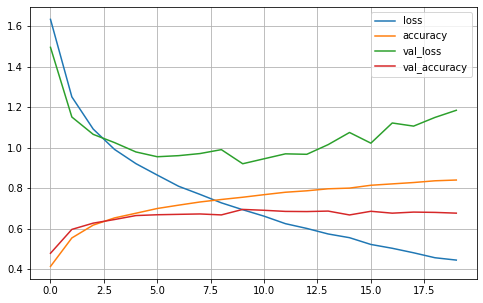

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [11]:
score = model.evaluate(test_images,test_labels)

score

313/313 [==============================] - 5s 17ms/step - loss: 1.1844 - accuracy: 0.6769


[1.1844465732574463, 0.6769000291824341]

In [12]:
y_pred = model.predict_classes(test_images)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 8, 0, ..., 5, 4, 7])

In [24]:
# 1.try to add probability output for 20 images

In [25]:
#2. try to use the updated function for predicting class output

In [ ]:
#3. try to plot with the predicted and original category names for those test images

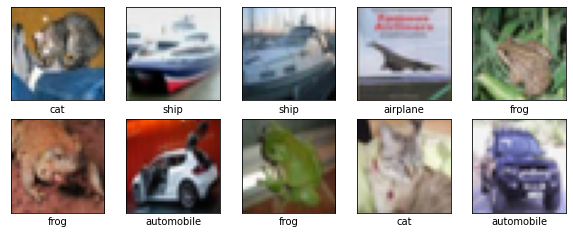

In [16]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(test_images[i])
    plt.xlabel(CIFAR100_LABELS_LIST[test_labels[i][0]])# Predicted category names
    #plt.ylabel(CIFAR100_LABELS_LIST[train_labels[i][0]])# Original category names
plt.show()

In [ ]:
# try to save the model

In [26]:
# conda install tensorflow

In [ ]:
# conda install keras